In [ ]:
import pandas as pd
import os
import csv
from pathlib import Path
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns







#**Modeling**








# Standard Scaler

In [ ]:
## intiate the Standard Scaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the CSV file into a dataframe
try:
    df = pd.read_csv('/content/Output/final_dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")

# Drop the 'statename' column as it's a string column
df = df.drop(columns=['StateName'])

# Split the dataset into train and test
# Assuming a 80/20 split and using a random_state for reproducibility
X = df.drop(columns=['Avg_House_Price'])
y = df['Avg_House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KDE Plots for Non-Scaled Data:


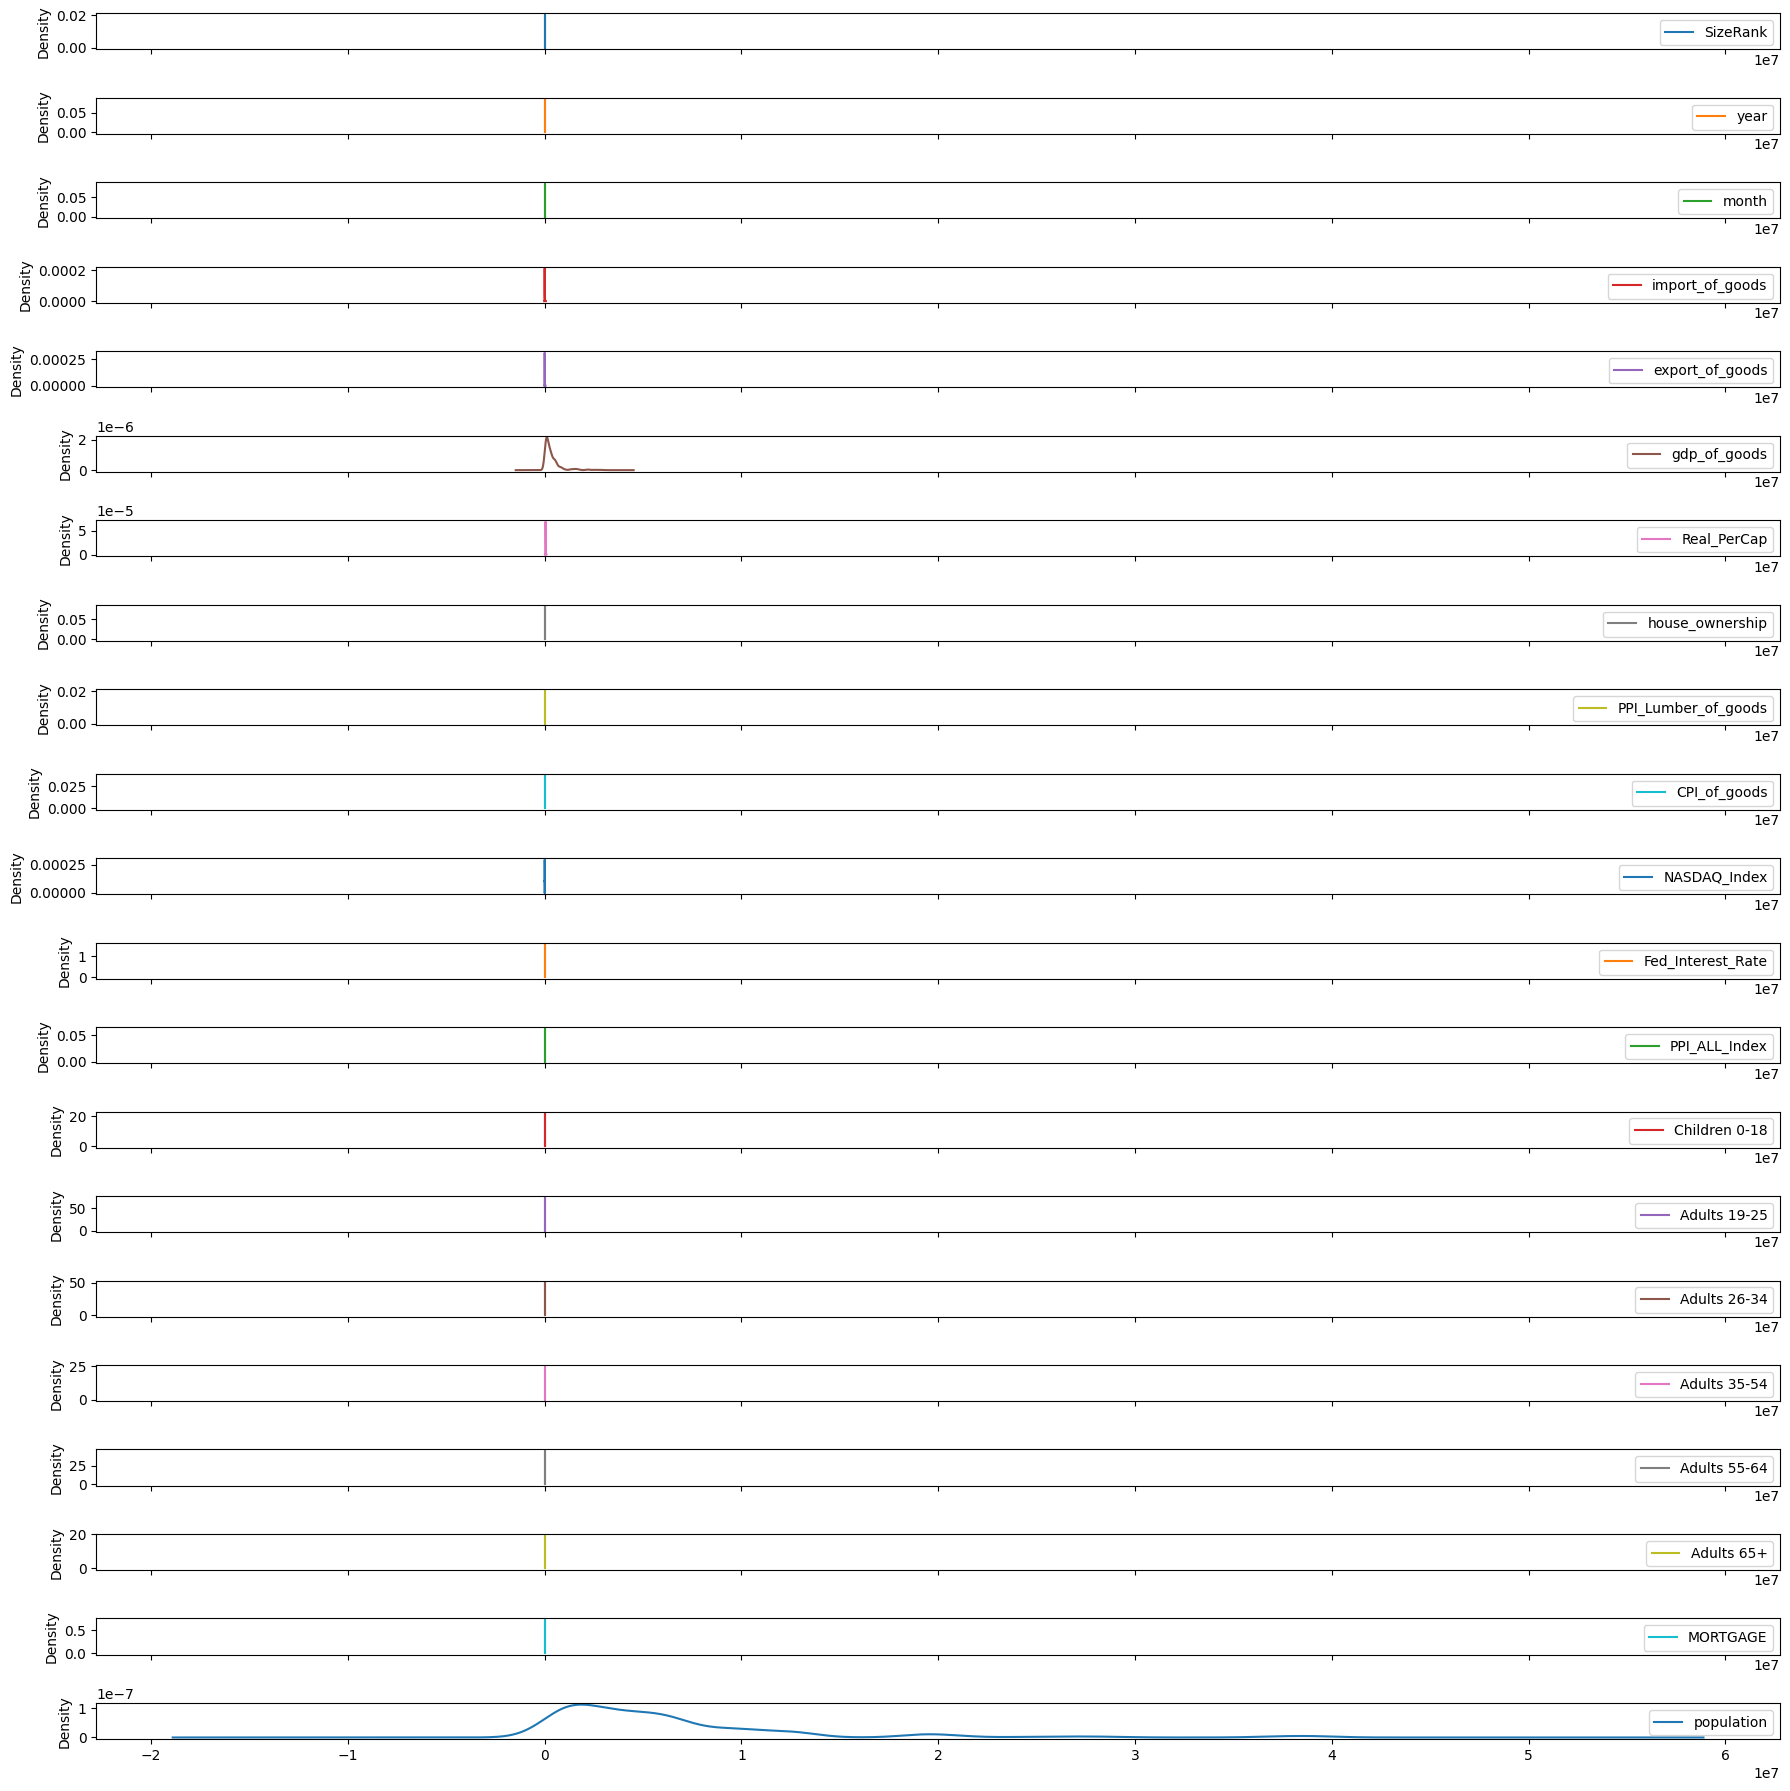

In [ ]:
# Plot the KDE for non-scaled data
print("KDE Plots for Non-Scaled Data:")
X_train.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()



In [ ]:
# Do Standard Scaler on both train and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

KDE Plots for Scaled Data:


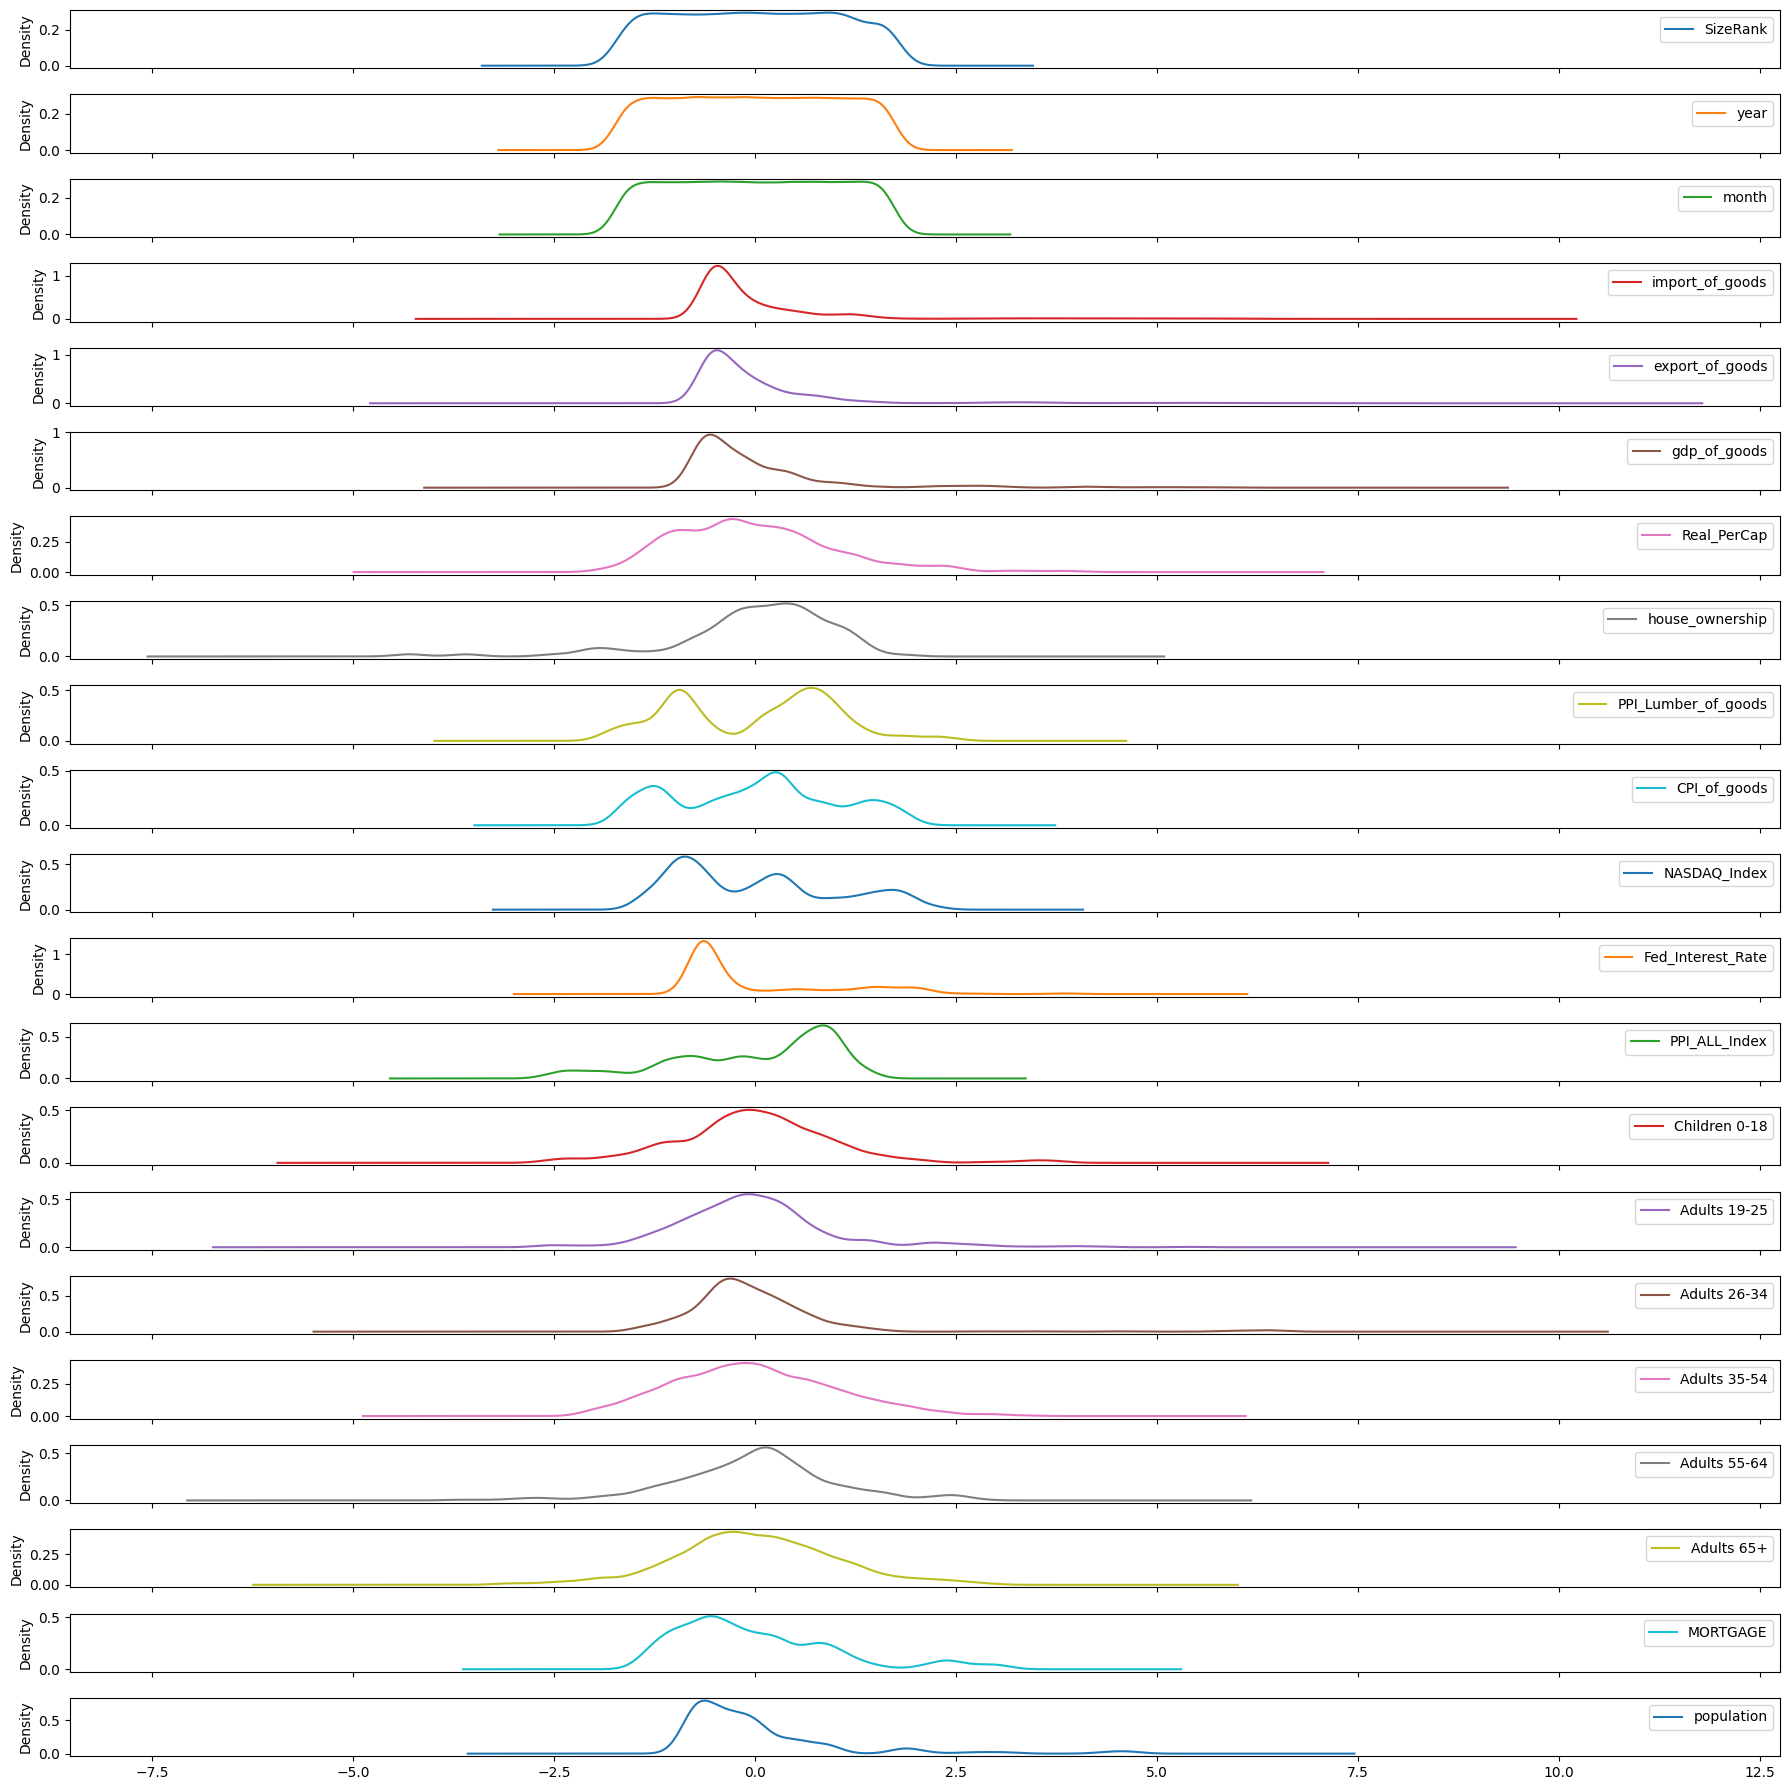

In [ ]:

# Plot the KDE for the scaled data
print("KDE Plots for Scaled Data:")
X_train_scaled_df.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()

## Linear Regression Model declaration ##


In [ ]:
# Load the CSV file into a dataframe
try:
    df = pd.read_csv('/content/Output/final_dataset.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    # Exit if file not found to prevent errors in subsequent steps
    exit()

# Drop the 'statename' column as it's a string column
df = df.drop(columns=['StateName'])

# Split the dataset into train and test
X = df.drop(columns=['Avg_House_Price'])
y = df['Avg_House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Do Standard Scaler on both train and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1) Build model pipelines + hyperparameter grids

# Linear Regression pipeline (as a baseline)
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso_feature_selection: {'poly_features__degree': 3, 'selector__estimator__alpha': np.float64(1.0)}
lasso: {'lasso__alpha': np.float64(4.414667091806673), 'poly_features__degree': 2}



linear_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
linear_param_dict = {
    'poly_features__degree': [2,3,4]
}
linear_grid = GridSearchCV(
    estimator=linear_pipe,
    param_grid=linear_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ridge grid
ridge_param_dict = {
    'poly_features__degree': [3,4],
    'ridge__alpha': np.logspace(-4, 2, 7)
}
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('ridge', Ridge(random_state=42))
])
ridge_grid = GridSearchCV(
    ridge_pipe,
    ridge_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Lasso (feature selection) grid
lasso_feature_selection_param_dict = {
    'poly_features__degree': [3,4],
    'selector__estimator__alpha':[np.float64(1.0)]
}
lasso_feature_selection_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('selector', SelectFromModel(estimator=Lasso(alpha=1, random_state=42))),
    ('lasso_feature_selection_model', LinearRegression())
])
lasso_feature_selection_grid = GridSearchCV(
    lasso_feature_selection_pipe,
    lasso_feature_selection_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Plain Lasso grid
lasso_param_dict = {
    'poly_features__degree': [3,4], # Added degree 1 for comparison
    'lasso__alpha': np.logspace(-3, 1, 5) # Range adjusted for better performance
}
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('lasso', Lasso(random_state=42))
])
lasso_grid = GridSearchCV(
    lasso_pipe,
    lasso_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Model registry
models = {
    'linear': linear_grid,
    'ridge': ridge_grid,
    'lasso_feature_selection': lasso_feature_selection_grid,
    'lasso': lasso_grid
}

In [ ]:
linear_pipe.fit(X_train_scaled, y_train)


ridge_pipe.fit(X_train_scaled, y_train)


lasso_pipe.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.216e+12, tolerance: 5.798e+09
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('lasso', Lasso(random_state=42))])


# Coefficient Comparison
Coefficient Comparison for a degree 1 model

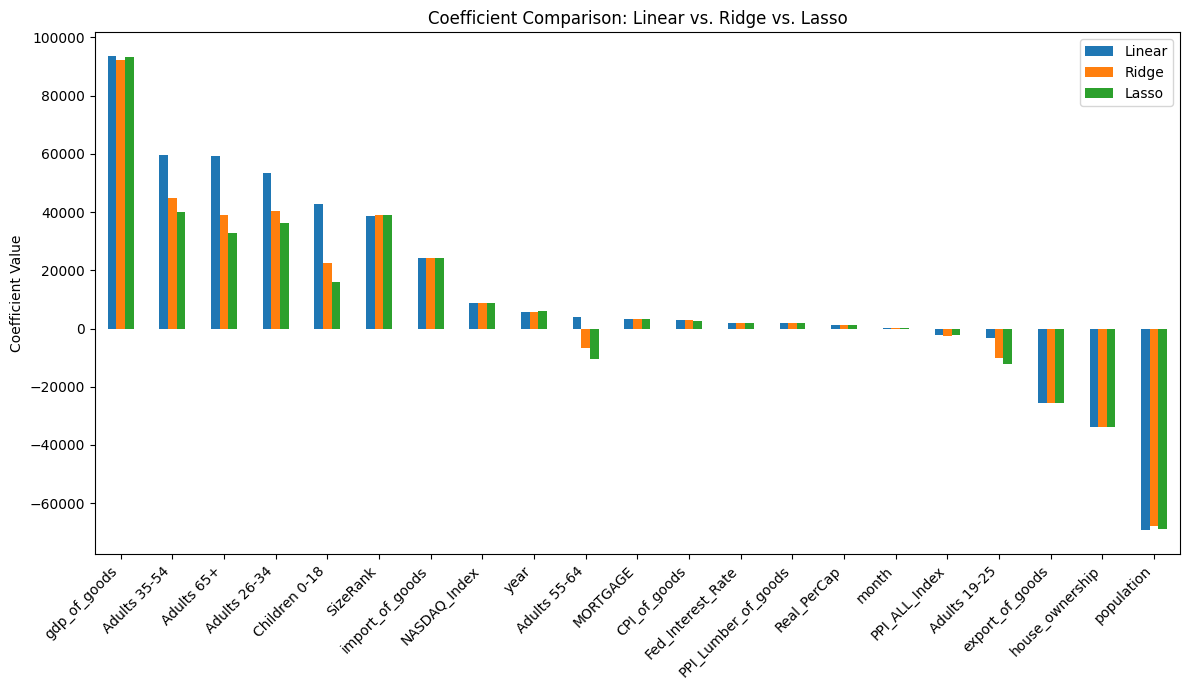

In [ ]:
linear_coef = linear_pipe.named_steps['linear'].coef_
linear_feature_names = linear_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
linear_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(linear_coef)}, index=linear_feature_names)
linear_coef_df = linear_coef_df.sort_values(by = "Coefficient Value", ascending = False)


ridge_coef = ridge_pipe.named_steps['ridge'].coef_
ridge_feature_names = ridge_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
ridge_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(ridge_coef)}, index=ridge_feature_names)
ridge_coef_df = ridge_coef_df.sort_values(by = "Coefficient Value", ascending = False)


lasso_coef = lasso_pipe.named_steps['lasso'].coef_
lasso_feature_names = lasso_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
lasso_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(lasso_coef)}, index=lasso_feature_names)
lasso_coef_df = lasso_coef_df.sort_values(by = "Coefficient Value", ascending = False)




df_lin  = linear_coef_df.rename(columns={'Coefficient Value': 'Linear'})
df_rid  = ridge_coef_df.rename(columns={'Coefficient Value': 'Ridge'})
df_las  = lasso_coef_df.rename(columns={'Coefficient Value': 'Lasso'})

combined_df = pd.concat([df_lin, df_rid, df_las], axis=1)

combined_df = combined_df.sort_values(by='Linear', ascending=False)

ax = combined_df.plot(
    kind='bar',
    figsize=(12, 7),
    title='Coefficient Comparison: Linear vs. Ridge vs. Lasso'
)
ax.set_ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Linear Model Training


Training and evaluating linear...
Training and evaluating ridge...
Training and evaluating lasso_feature_selection...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.833e+11, tolerance: 5.798e+09
  model = cd_fast.enet_coordinate_descent(


Training and evaluating lasso...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.928e+10, tolerance: 5.798e+09
  model = cd_fast.enet_coordinate_descent(



Per-Model Test Predictions Plots:


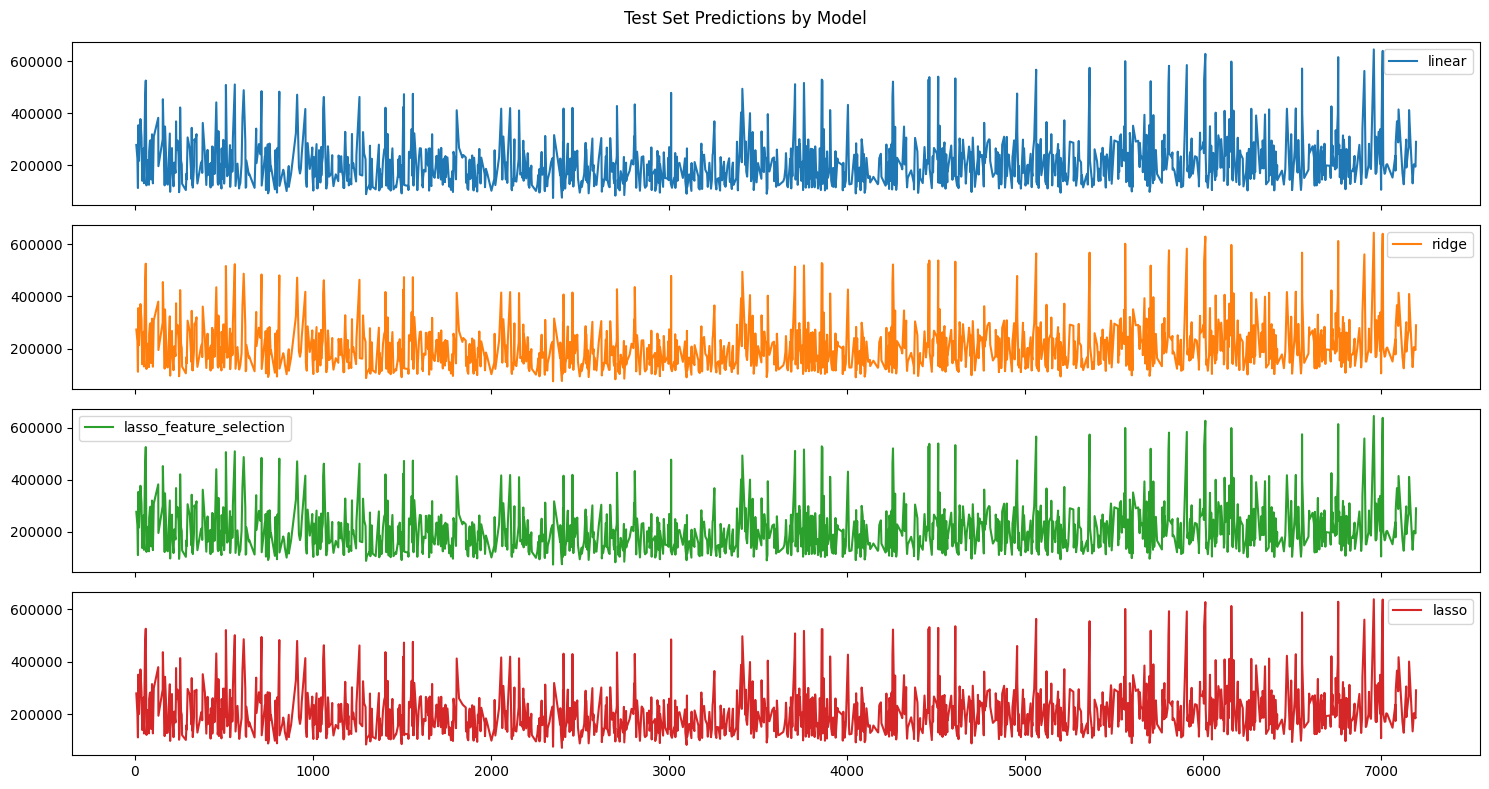


RMSE Summary Table:
                          Train RMSE    Test RMSE Generalization Gap
linear                    2113.42068  4390.291952        2276.871272
lasso_feature_selection  2134.942111  4406.943321         2272.00121
ridge                    2429.683497  4742.210469        2312.526972
lasso                    2641.474024  5209.045879        2567.571855


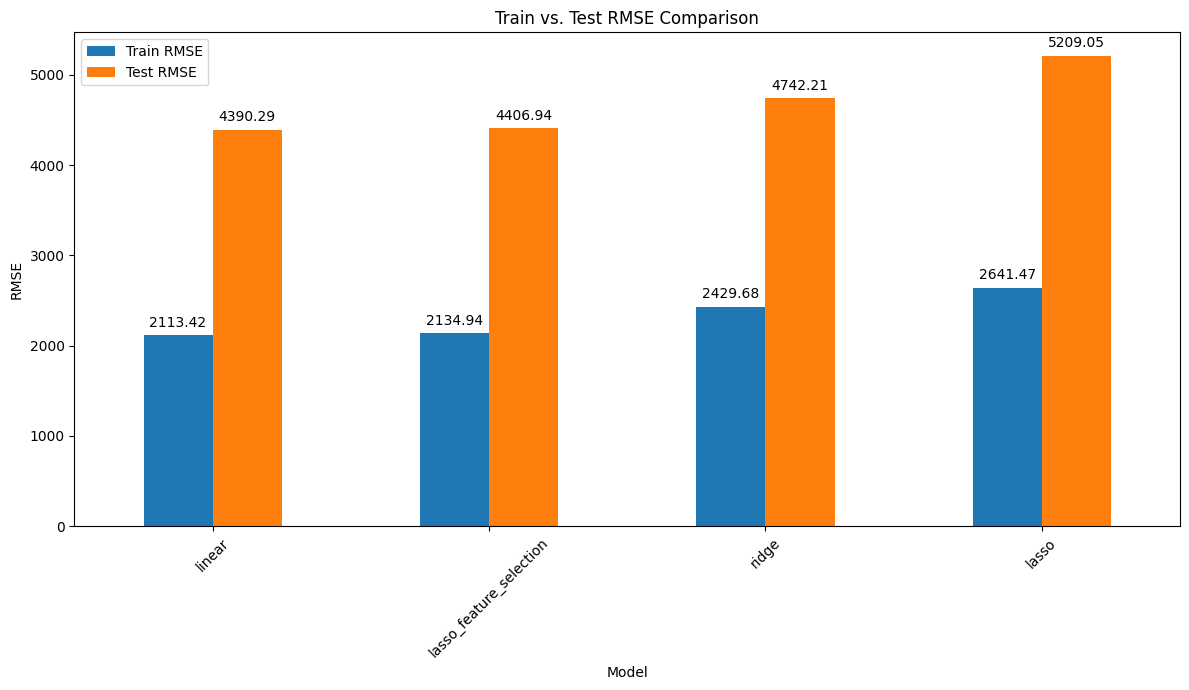


Best Hyperparameters:
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso_feature_selection: {'poly_features__degree': 3, 'selector__estimator__alpha': np.float64(1.0)}
lasso: {'lasso__alpha': np.float64(1.0), 'poly_features__degree': 4}


In [ ]:
results = {}
y_train_pred = {}
y_test_pred = {}

for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    y_train_pred[name] = y_pred_train
    y_test_pred[name] = y_pred_test

    # Extract and store coefficients
    try:
        # Get feature names from the polynomial transformer
        poly_features_step = best_model.named_steps['poly_features']
        all_feature_names = poly_features_step.get_feature_names_out(X_train.columns)

        if name == 'lasso_feature_selection':
            # For feature selection model, get the mask of selected features
            selector = best_model.named_steps['selector']
            selected_features_mask = selector.get_support()
            feature_names = all_feature_names[selected_features_mask]

            # The coefficients are from the LinearRegression step
            coefs = best_model.named_steps['lasso_feature_selection_model'].coef_
        else:
            # For all other models, use all feature names
            feature_names = all_feature_names
            # Get the name of the final estimator step (e.g., 'linear', 'ridge', 'lasso')
            estimator_name = list(best_model.named_steps.keys())[-1]
            coefs = best_model.named_steps[estimator_name].coef_

        results[name]['Coefficients'] = pd.DataFrame(coefs, index=feature_names, columns=['Coefficient Value'])
    except KeyError:
        # Handle cases where the model might not have a 'coef_' attribute (e.g., if a different type of model was used)
        print(f"Warning: Could not extract coefficients for model '{name}'.")


#  Plot the per-model test predictions
y_test_pred_df = pd.DataFrame(y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
rmse_df = pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]
rmse_df['Generalization Gap'] = rmse_df['Test RMSE'] - rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in results.items():
    print(f"{name}: {result['Best Parameters']}")

In [ ]:
pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]

,Train RMSE,Test RMSE
linear,2113.42068,4390.291952
ridge,2429.683497,4742.210469
lasso_feature_selection,2134.942111,4406.943321
lasso,2641.474024,5209.045879


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Other Regression techniques

In [ ]:
# Decision Tree Regressor
decision_tree_param_dict = {
    'decisiontree__max_depth': [None, 10, 20, 30],
    'decisiontree__min_samples_split': [2, 5, 10],
    'decisiontree__min_samples_leaf': [1, 2, 4]
}

decision_tree_pipe = Pipeline([
    ('decisiontree', DecisionTreeRegressor())
])

decision_tree_grid = GridSearchCV(
    decision_tree_pipe,
    param_grid=decision_tree_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)
# Support Vector Regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

svm_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('svm', SVR())
])

# Update the parameter grid to match the new pipeline steps
svm_param_dict = {
    'poly_features__degree': [1, 2], # Test with and without polynomial features
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_pipe, param_grid=svm_param_dict, cv=5, scoring='neg_mean_squared_error', verbose=1)



# Model Training

In [ ]:
_# Dictionaries to store results
cf_results = {}
cf_y_train_pred = {}
cf_y_test_pred = {}
# Model registry
classification_models = {
    'decisiontree': decision_tree_grid,
    'svm': svm_grid,
}


### 3) Train, predict, and collect results
for name, model in classification_models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    cf_results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    cf_y_train_pred[name] = y_pred_train
    cf_y_test_pred[name] = y_pred_test

Training and evaluating decisiontree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training and evaluating svm...
Fitting 5 folds for each of 24 candidates, totalling 120 fits



Per-Model Test Predictions Plots:


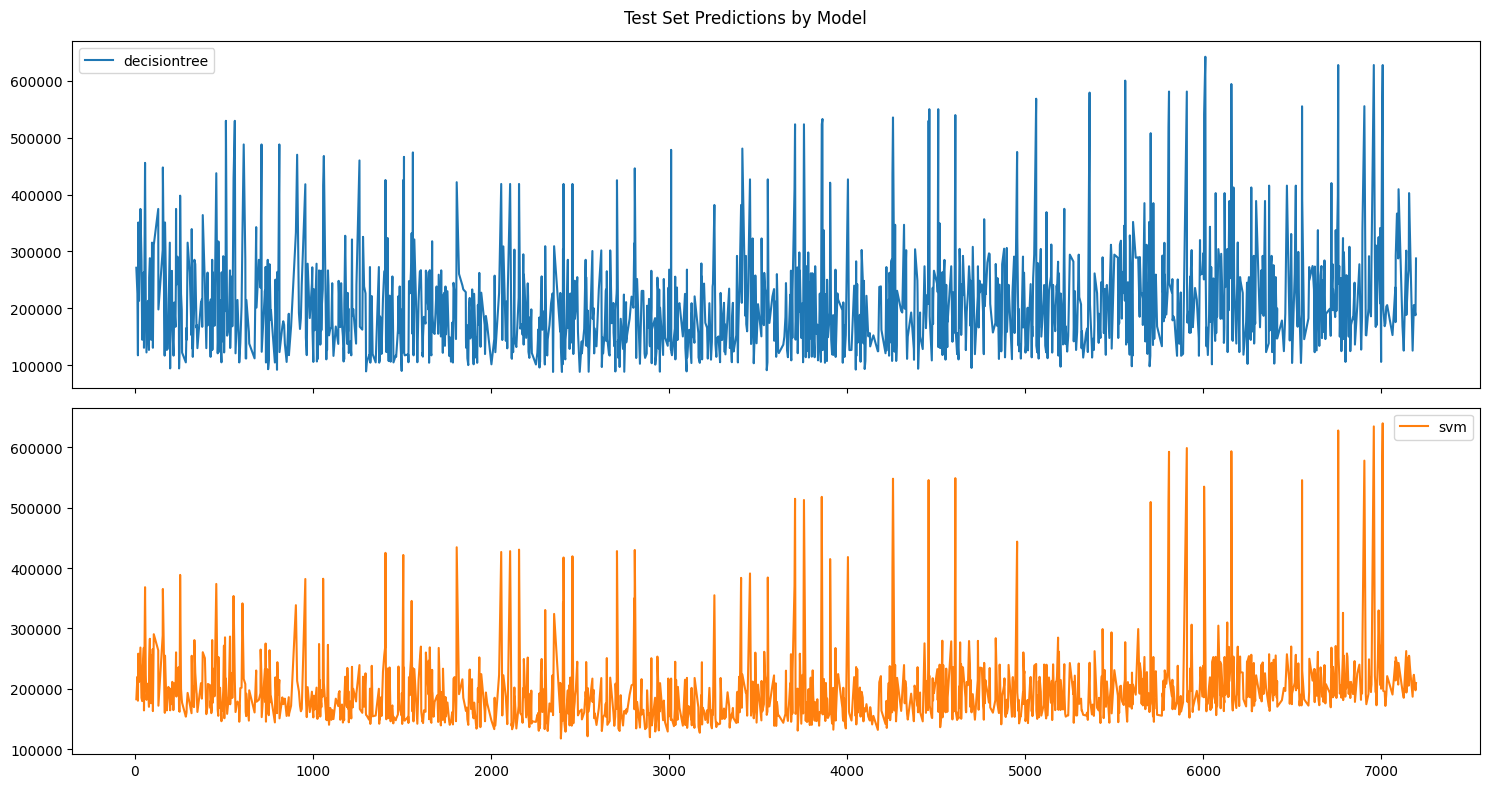


RMSE Summary Table:
                Train RMSE     Test RMSE Generalization Gap
decisiontree   3665.643415   9951.167506        6285.524091
svm           64050.833487  57379.408503       -6671.424983


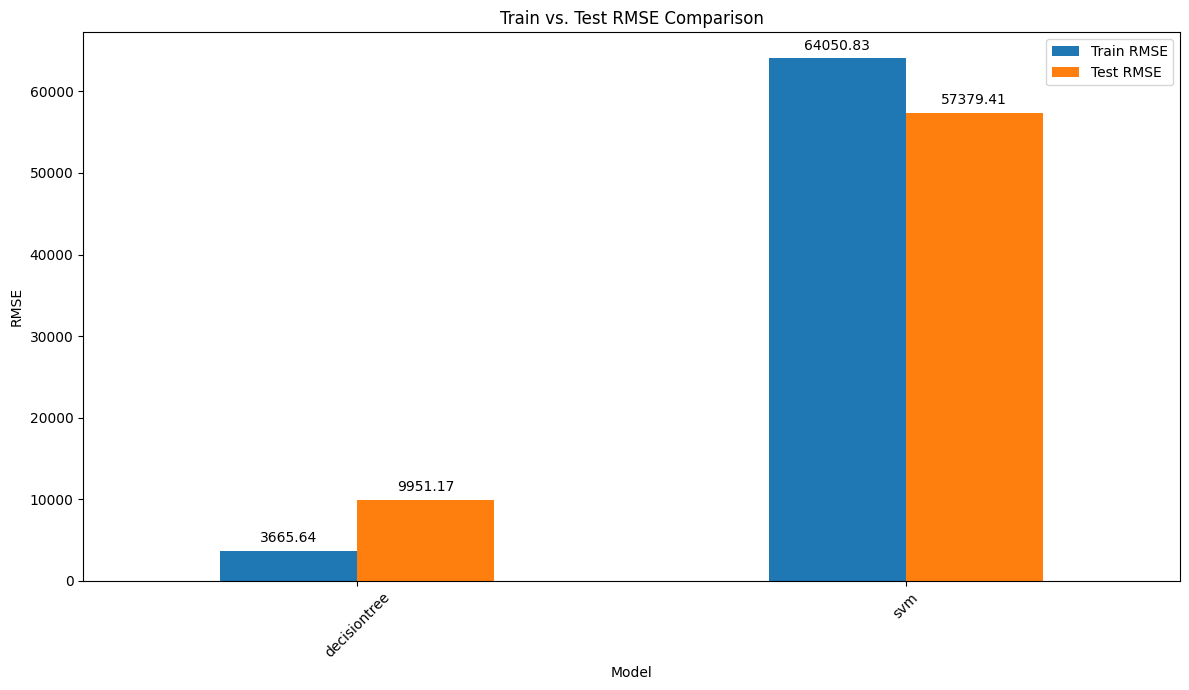


Best Hyperparameters:
decisiontree: {'decisiontree__max_depth': 30, 'decisiontree__min_samples_leaf': 2, 'decisiontree__min_samples_split': 2}
svm: {'poly_features__degree': 2, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}


In [ ]:
### 2) Extract and compare coefficients

#  Plot the per-model test predictions
cf_y_test_pred_df = pd.DataFrame(cf_y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
cf_y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
cf_rmse_df = pd.DataFrame(cf_results).T[['Train RMSE', 'Test RMSE']]
cf_rmse_df['Generalization Gap'] = cf_rmse_df['Test RMSE'] - cf_rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(cf_rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = cf_rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in cf_results.items():
    print(f"{name}: {result['Best Parameters']}")

# **Train vs. Test RMSE Comparison for all models**




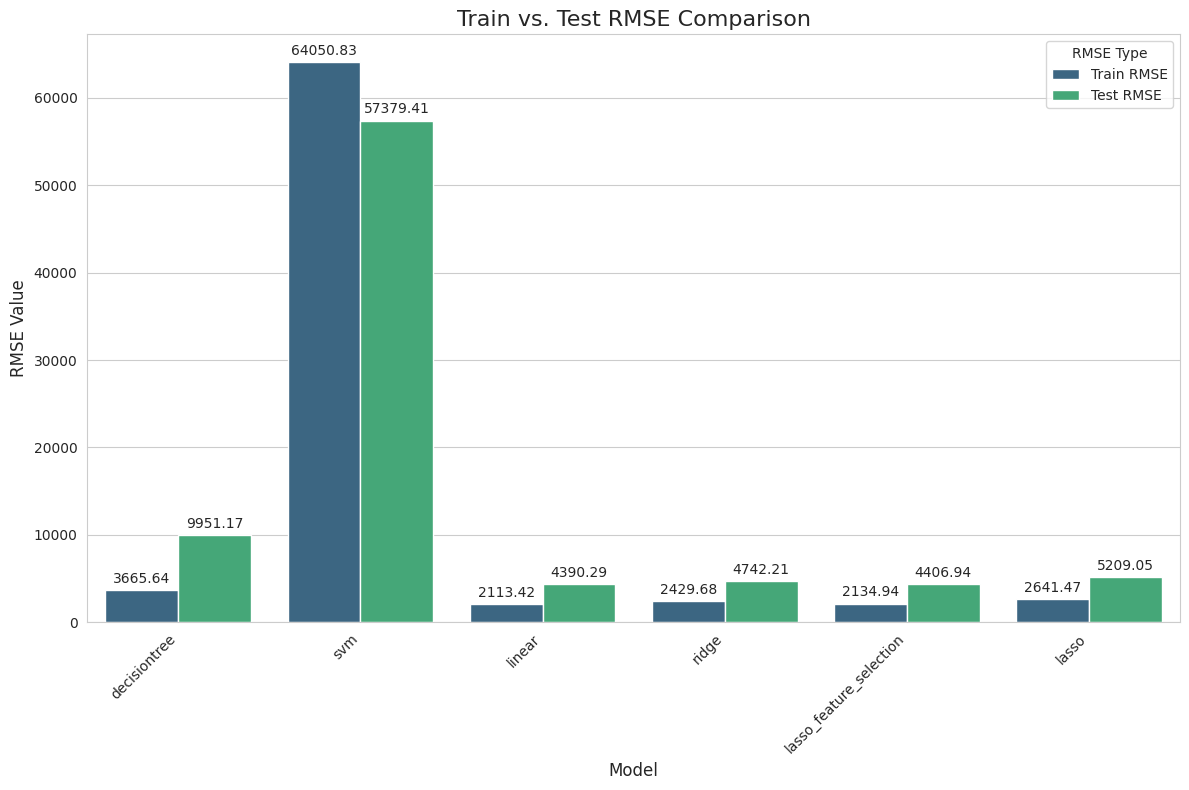

In [ ]:

try:
    if 'Model' not in cf_rmse_df.columns:
        cf_rmse_df['Model'] = cf_rmse_df.index
    if 'Model' not in rmse_df.columns:
        rmse_df['Model'] = rmse_df.index

    comparison_df = pd.concat([cf_rmse_df, rmse_df], ignore_index=True)
    sns.set_style("whitegrid")
    melted_df = comparison_df.melt(id_vars='Model', value_vars=['Train RMSE', 'Test RMSE'],
                                   var_name='RMSE Type', value_name='RMSE Value')

    # Create the grouped bar chart
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Model', y='RMSE Value', hue='RMSE Type', data=melted_df, palette='viridis')

    # Add labels and a title
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("RMSE Value", fontsize=12)
    plt.title("Train vs. Test RMSE Comparison", fontsize=16)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add the RMSE values on top of the bars for clarity
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

    # Adjust plot layout
    plt.tight_layout()

    # Display the plot
    plt.show()

except NameError:
    print("Error: `cf_rmse_df` or `rmse_df` not found.")
    print("Please make sure these DataFrames are defined in your notebook before running this cell.")



# Coefficient Comparison for SVM
Coefficient Comparison for differrent features using Linear SVR Model

Linear SVR Training RMSE: 98475.7116
Linear SVR Test RMSE: 88816.8707




/tmp/ipython-input-1686382574.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


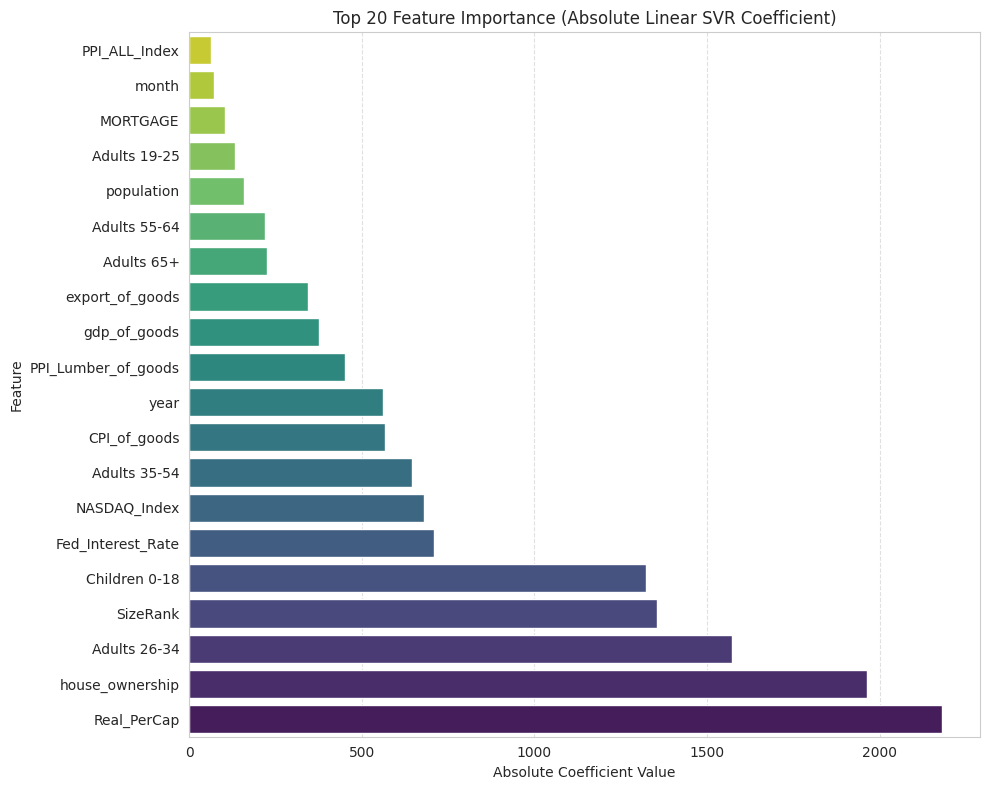

/tmp/ipython-input-1686382574.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


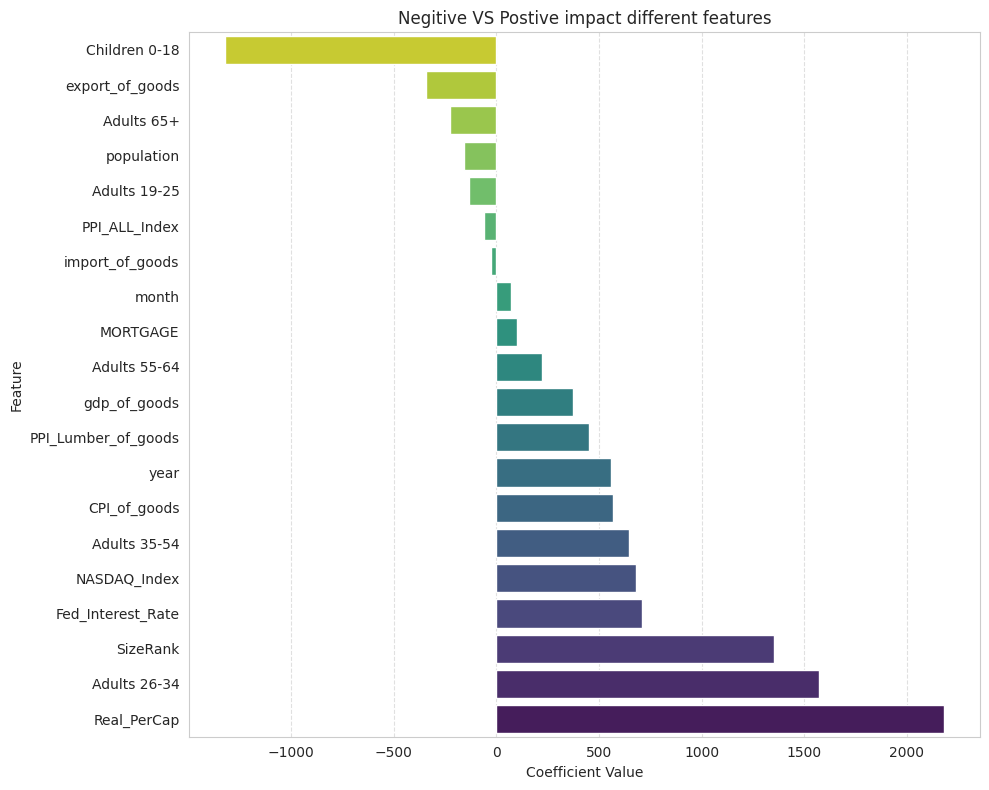

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Train the Linear SVR Model ---
# Use Pipeline to scale and then train SVR with a linear kernel
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='linear'))
])

# Fit the model using the relative training data
# Assuming X_train_rel and y_train_rel are available
svr_pipeline.fit(X_train_scaled, y_train)

# --- 2. Calculate and Print RMSE ---

# Predict on the Training Set
y_train_pred = svr_pipeline.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on the Test Set (Crucial for assessing generalization)
# Assuming X_test_rel and y_test_rel are available
y_test_pred = svr_pipeline.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Linear SVR Training RMSE: {train_rmse:.4f}")
print(f"Linear SVR Test RMSE: {test_rmse:.4f}")
print("\n" + "="*40 + "\n")
feature_names = X_train.columns.tolist()


# --- 3. Extract and Process Coefficients for Importance Plot ---
# The Linear SVR coefficients are in the 'svr' step of the pipeline
coefficients = svr_pipeline.named_steps['svr'].coef_.ravel()

# Create a DataFrame for easy sorting and plotting
# Assuming 'feature_names' (e.g., X_train_rel.columns) is available
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_Absolute': np.abs(coefficients)
}).sort_values(by='Coefficient_Absolute', ascending=False)


# --- 4. Plot Feature Importance ---
# Select the top 20 features for plotting
top_n = 20
plot_data = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient_Absolute',
    y='Feature',
    data=plot_data,
    palette='viridis'
)

plt.title(f'Top {top_n} Feature Importance (Absolute Linear SVR Coefficient)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.tight_layout()
plt.savefig("linear_svr_feature_importance.png")
plt.show()


# --- 5. Extract and Process Coefficients for Importance Plot ---
# The Linear SVR coefficients are in the 'svr' step of the pipeline
coefficients = svr_pipeline.named_steps['svr'].coef_.ravel()

# Create a DataFrame for easy sorting and plotting
# Assuming 'feature_names' (e.g., X_train_rel.columns) is available
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


# --- 6. Plot Feature Importance ---
# Select the top 20 features for plotting
top_n = 20
plot_data = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=plot_data,
    palette='viridis'
)

plt.title(f'Negitive VS Postive impact different features')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.tight_layout()
plt.savefig("linear_svr_feature_importance.png")
plt.show()







#**Model For Relative Increase Dataset**








In [ ]:
## intiate the Standard Scaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Load the CSV file into a dataframe
try:
    df = pd.read_csv('/content/Output/dataset_relative.csv')
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
# Drop columns to reduce multicollinearity
drop_cols = [
    # Time/market cluster (very high co-movement)
    "year", "month", "NASDAQ_Index_rel",
    "PPI_ALL_Index_rel", "PPI_Lumber_of_goods_rel"  # keep CPI_of_goods_rel as the cost proxy
]

df = df.drop(columns=[c for c in drop_cols if c in df.columns]).copy()

print("Dropped:", [c for c in drop_cols if c in df.columns])
print("Remaining columns:", df.columns.tolist())


Dropped: []
Remaining columns: ['StateName', 'import_of_goods_rel', 'export_of_goods_rel', 'gdp_of_goods_rel', 'Real_PerCap_rel', 'house_ownership_rel', 'CPI_of_goods_rel', 'Fed_Interest_Rate_rel', 'Children 0-18_rel', 'Adults 19-25_rel', 'Adults 26-34_rel', 'Adults 35-54_rel', 'Adults 55-64_rel', 'Adults 65+_rel', 'MORTGAGE_rel', 'Avg_House_Price_rel']


# Standard Scaler

In [ ]:




# Drop the 'statename' column as it's a string column
df = df.drop(columns=['StateName'])

# Split the dataset into train and test
# Assuming a 80/20 split and using a random_state for reproducibility
X = df.drop(columns=['Avg_House_Price_rel'])
y = df['Avg_House_Price_rel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



KDE Plots for Non-Scaled Data:


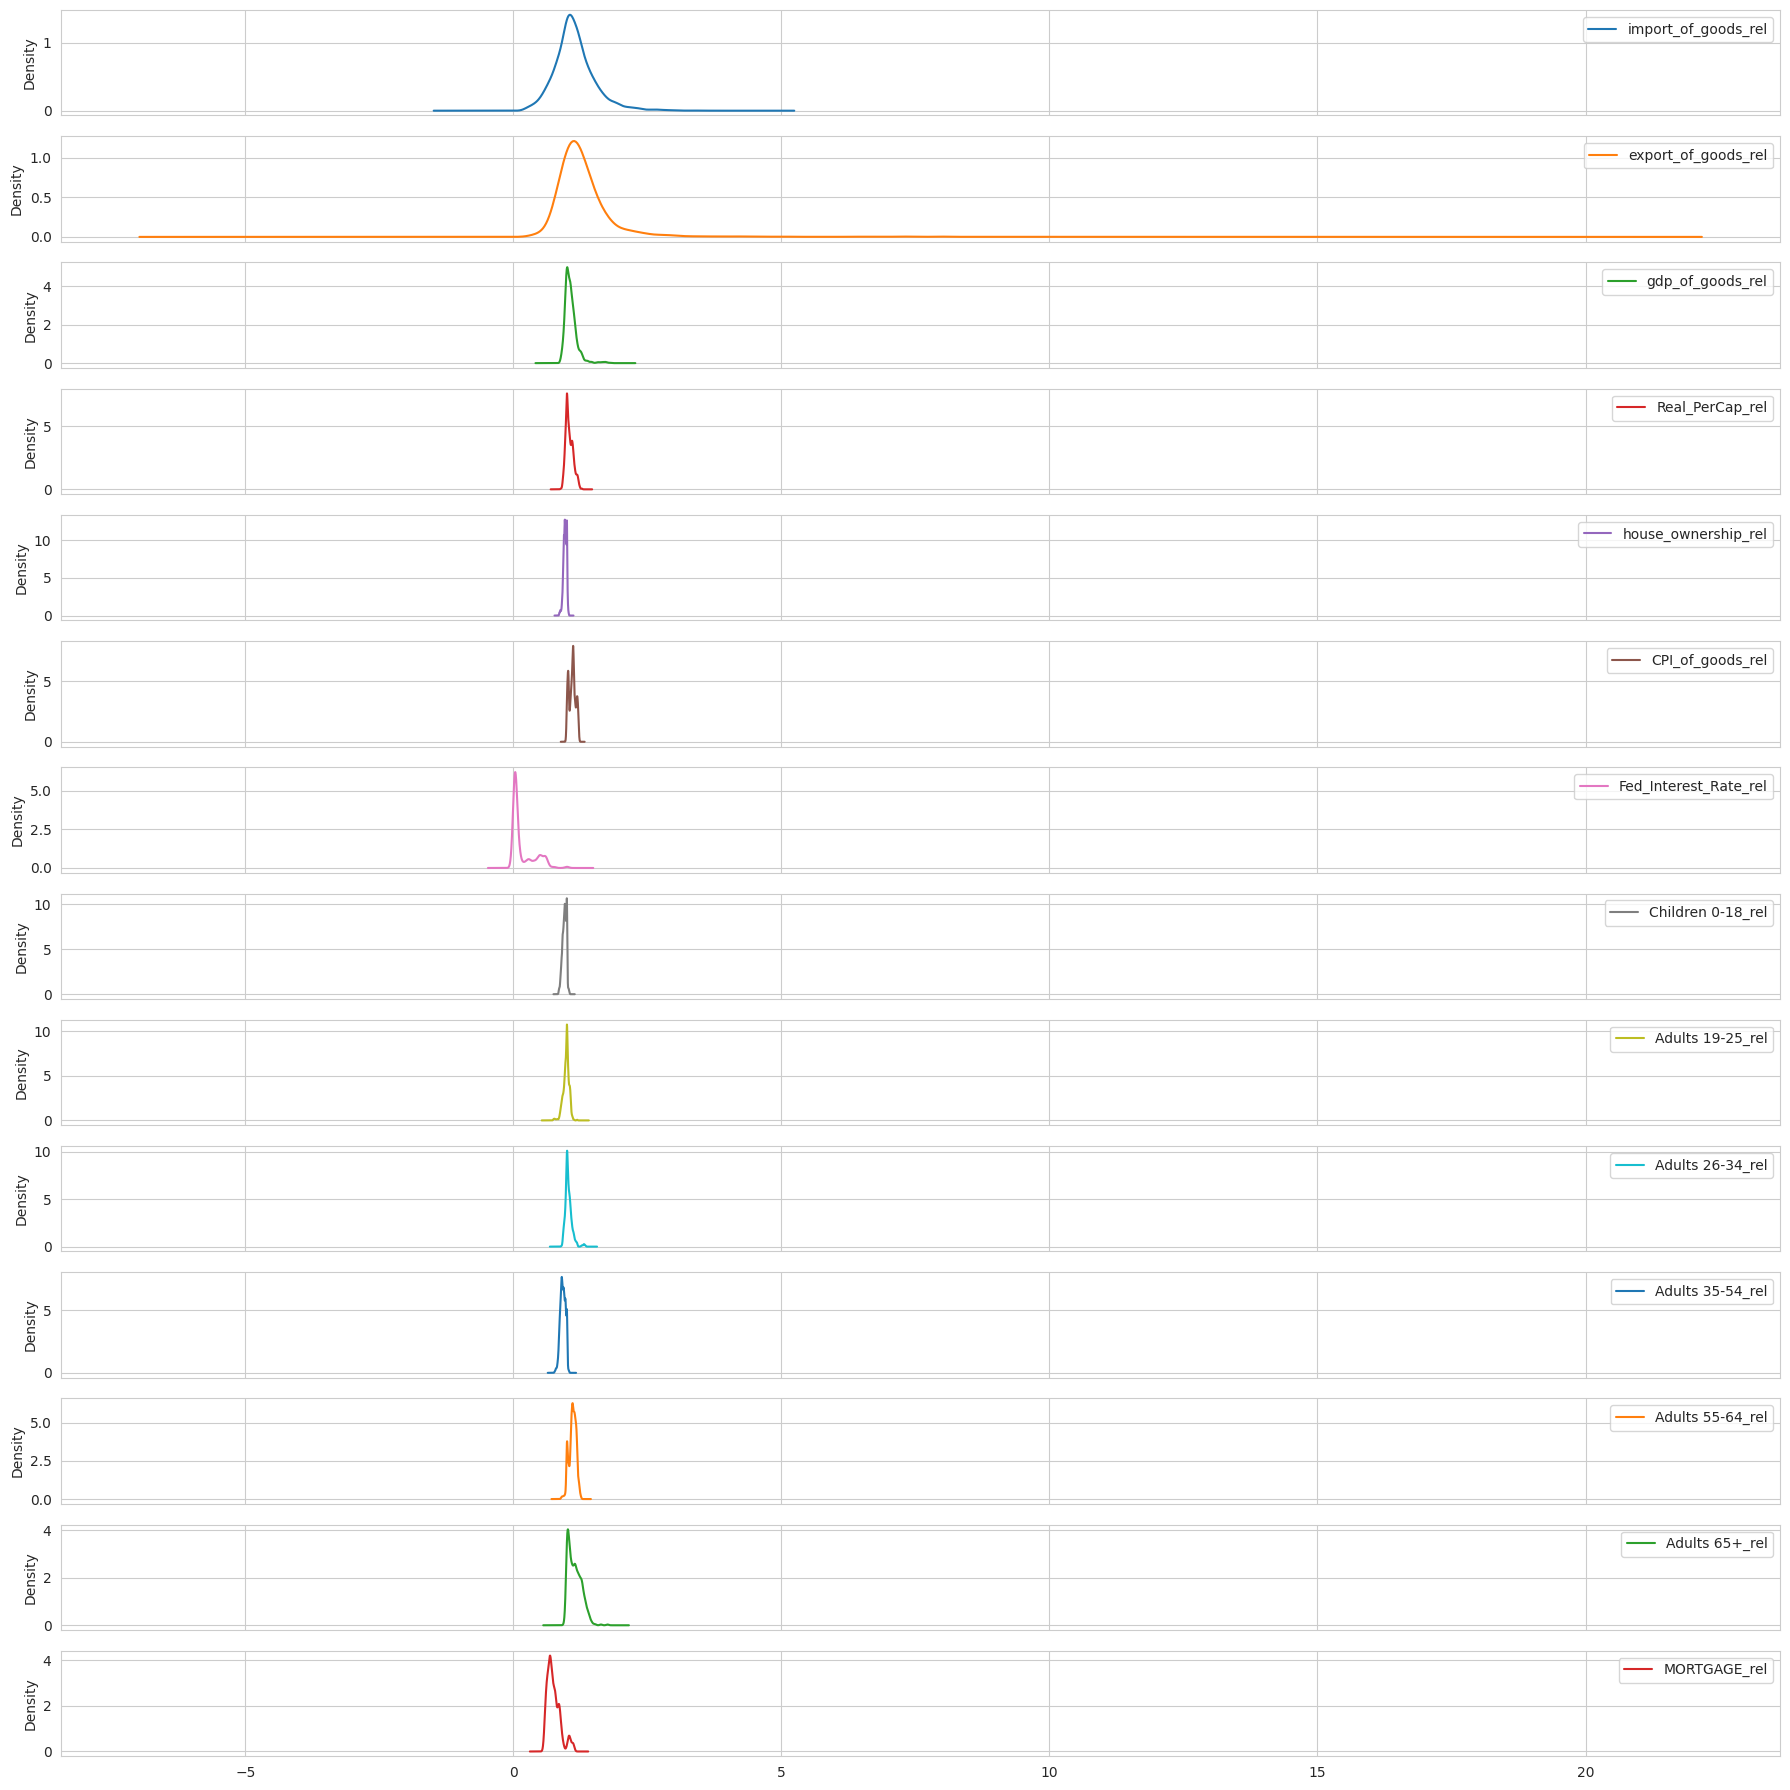

In [ ]:
# Plot the KDE for non-scaled data
print("KDE Plots for Non-Scaled Data:")
X_train.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()



In [ ]:
# Do Standard Scaler on both train and test datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled array back to a DataFrame for plotting
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

KDE Plots for Scaled Data:


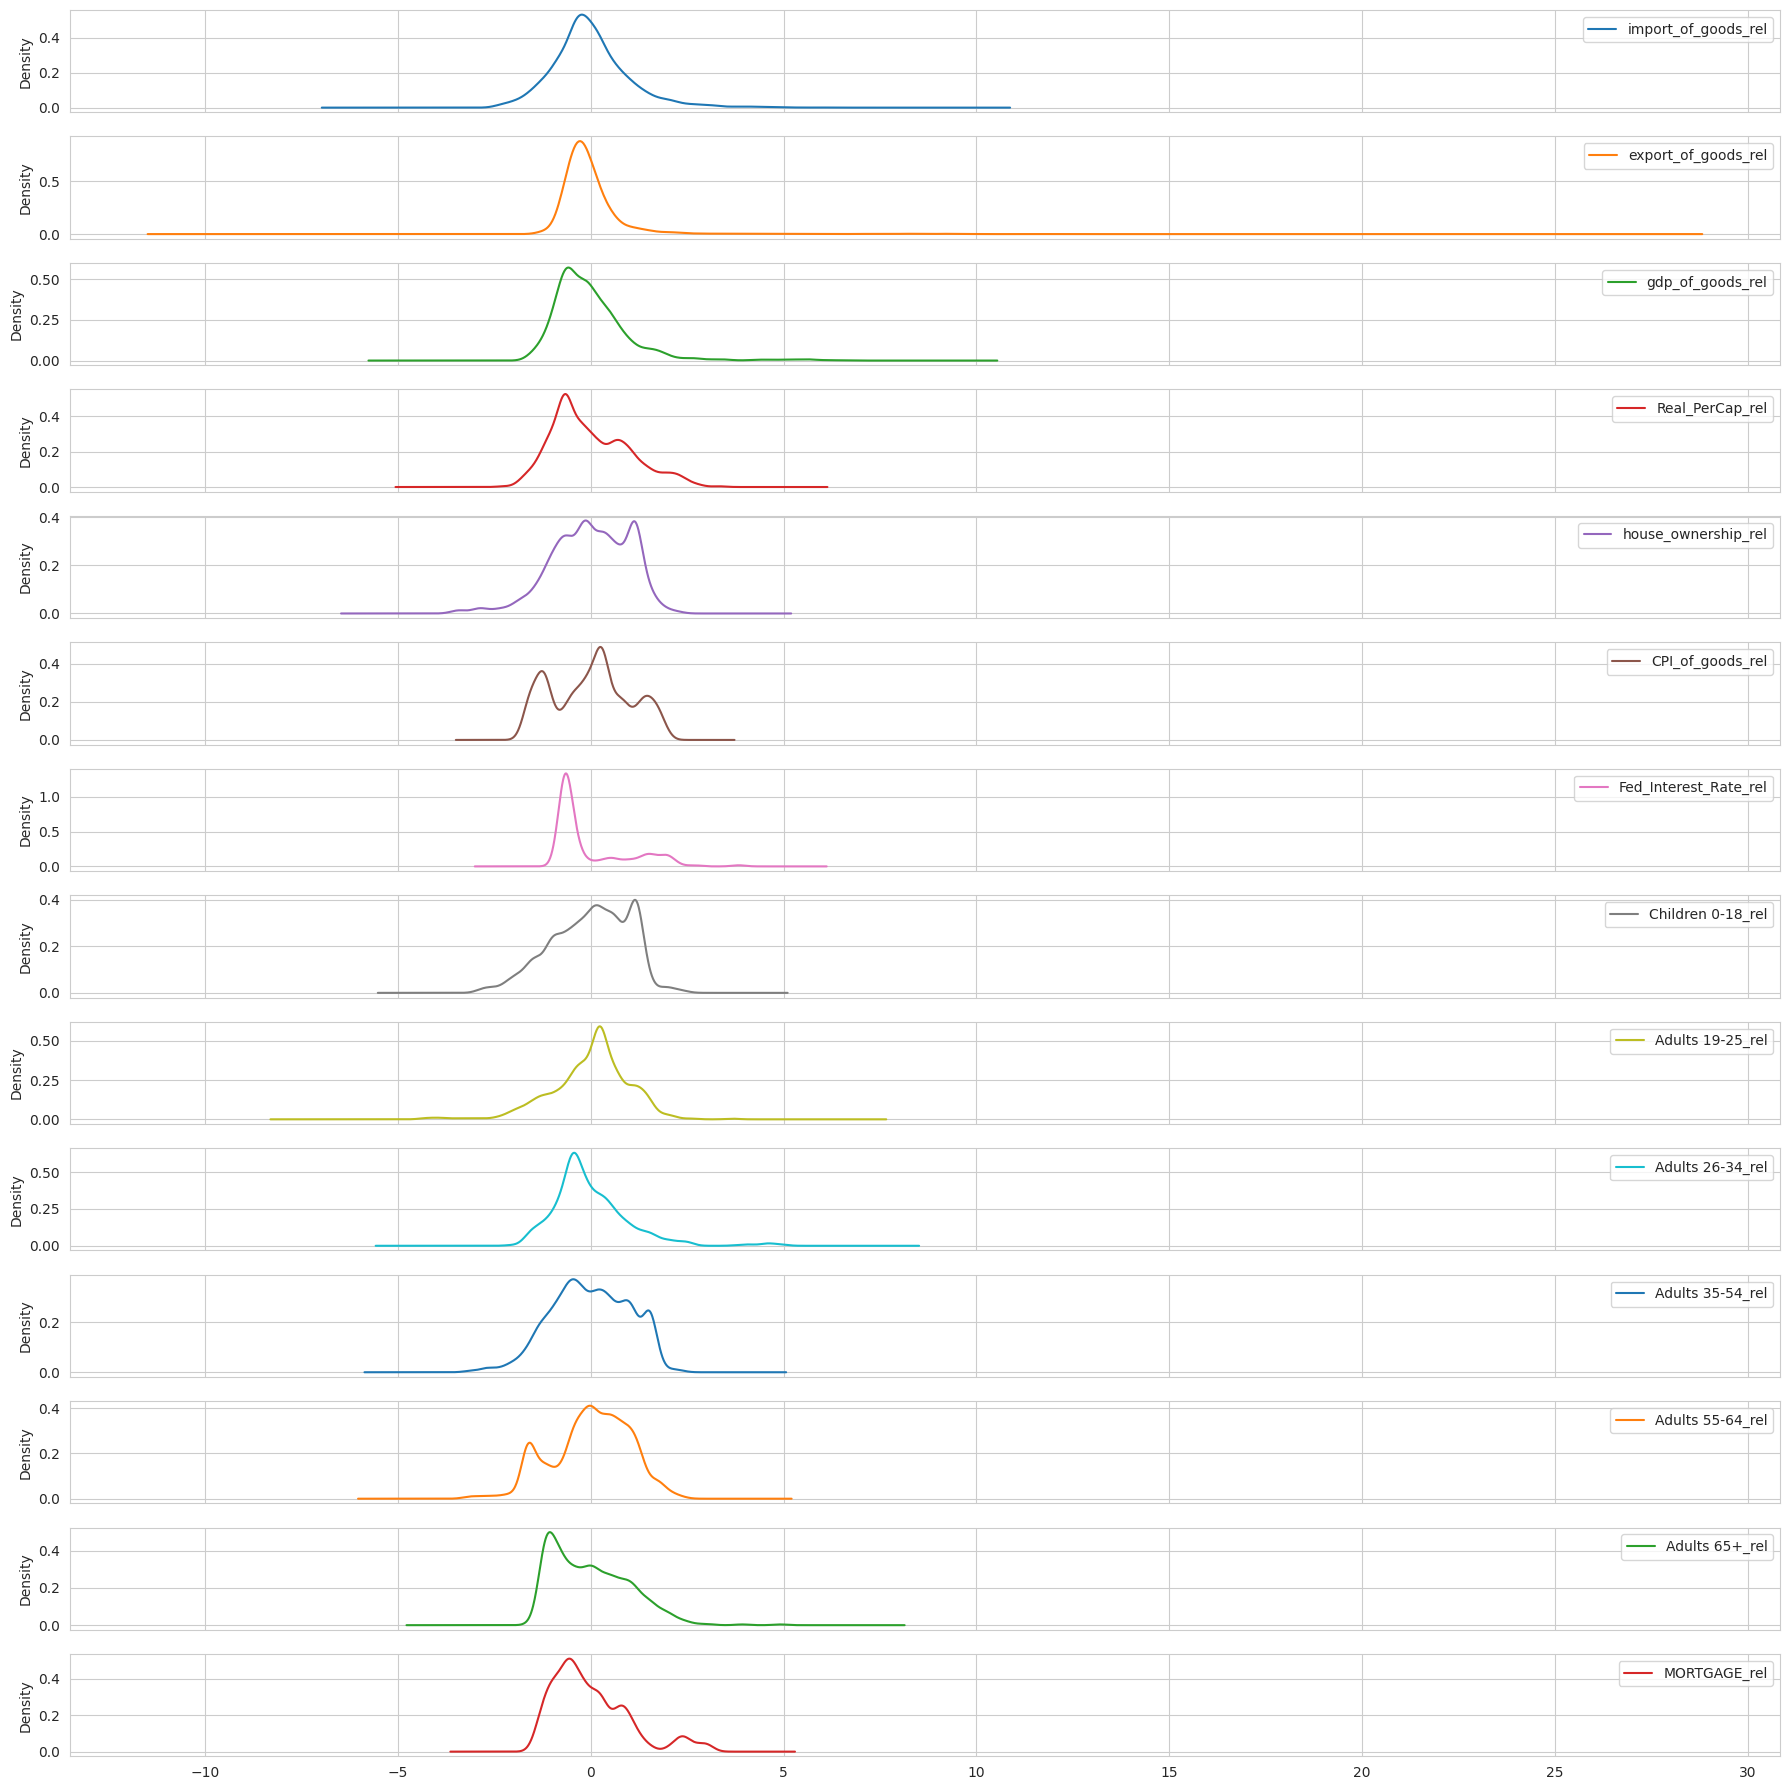

In [ ]:

# Plot the KDE for the scaled data
print("KDE Plots for Scaled Data:")
X_train_scaled_df.plot(kind='kde', subplots=True, figsize=(18, 18))
plt.tight_layout()
plt.show()

## Linear Regression Model declaration ##


In [ ]:
from sklearn.linear_model import LassoCV

### 1) Build model pipelines + hyperparameter grids

# Linear Regression pipeline (as a baseline)
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso_feature_selection: {'poly_features__degree': 3, 'selector__estimator__alpha': np.float64(1.0)}
lasso: {'lasso__alpha': np.float64(4.414667091806673), 'poly_features__degree': 2}



linear_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear', LinearRegression())
])
linear_param_dict = {
    'poly_features__degree': [3]
}
linear_grid = GridSearchCV(
    estimator=linear_pipe,
    param_grid=linear_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Ridge grid
ridge_param_dict = {
    'poly_features__degree': [1,2, 3],
    'ridge__alpha': [np.float64(0.001)]
}
ridge_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('ridge', Ridge(random_state=42))
])
ridge_grid = GridSearchCV(
    ridge_pipe,
    ridge_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Lasso (feature selection) grid
lasso_feature_selection_param_dict = {
    'poly_features__degree': [3],
    'selector__estimator__alpha':[np.float64(1.0)]
}
lasso_feature_selection_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(estimator=Lasso(alpha=1, random_state=42))),
    ('lasso_feature_selection_model', LinearRegression())
])
lasso_feature_selection_grid = GridSearchCV(
    lasso_feature_selection_pipe,
    lasso_feature_selection_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Plain Lasso grid
lasso_param_dict = {
    'poly_features__degree': [3], # Added degree 1 for comparison
    'lasso__alphas': [np.logspace(-4, 2, 30)]  # Range adjusted for better performance
}
lasso_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
   ("lasso", LassoCV(
        cv=5,
        alphas=np.logspace(-4, 2, 60),   # explore small → large regularization
        max_iter=20000,
        random_state=42
    ))
])
# lasso_pipe = Pipeline([
#     ('poly_features', PolynomialFeatures(degree=1, include_bias=False)),
#     ("lasso", Lasso( max_iter=10000, random_state=42))
# ])
lasso_grid = GridSearchCV(
    lasso_pipe,
    lasso_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Model registry
models = {
    'linear': linear_grid,
    'ridge': ridge_grid,
    'lasso': lasso_grid
}

In [ ]:
linear_pipe.fit(X_train_scaled, y_train)


ridge_pipe.fit(X_train_scaled, y_train)


lasso_pipe.fit(X_train_scaled, y_train)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('lasso',
                 LassoCV(alphas=array([1.00000000e-04, 1.26384820e-04, 1.59731228e-04, 2.01876025e-04,
       2.55140652e-04, 3.22459055e-04, 4.07539297e-04, 5.15067808e-04,
       6.50967523e-04, 8.22724134e-04, 1.03979842e-03, 1.31414736e-03,
       1.66088278e-03, 2.09910372e-03, 2.65294846e-03, 3.35292415e-...
       4.58159767e-01, 5.79044398e-01, 7.31824222e-01, 9.24914728e-01,
       1.16895182e+00, 1.47737765e+00, 1.86718109e+00, 2.35983347e+00,
       2.98247129e+00, 3.76939098e+00, 4.76393801e+00, 6.02089449e+00,
       7.60949669e+00, 9.61724871e+00, 1.21547425e+01, 1.53617495e+01,
       1.94149195e+01, 2.45375111e+01, 3.10116893e+01, 3.91940677e+01,
       4.95353521e+01, 6.26051657e+01, 7.91234262e+01, 1.00000000e+02]),
                         cv=5, max_iter=20000, random_state=42))])

In [ ]:
lasso_coef = lasso_pipe.named_steps['lasso'].coef_
print(lasso_coef)
ridge_coef = ridge_pipe.named_steps['ridge'].coef_
print(ridge_coef)


[-0.02049148  0.00212983  0.0551547   0.04064841  0.01024496  0.05085463
  0.01859418  0.05495188 -0.00306419  0.0030214  -0.01816288 -0.03427631
  0.02633722  0.02105353]
[-0.02063372  0.0021226   0.05491132  0.04090846  0.01044824  0.05165022
  0.01831634  0.05575633 -0.00276006  0.0034078  -0.01779043 -0.03428279
  0.02699884  0.0213491 ]


# Coefficient Comparison
Coefficient Comparison for a degree 1 model

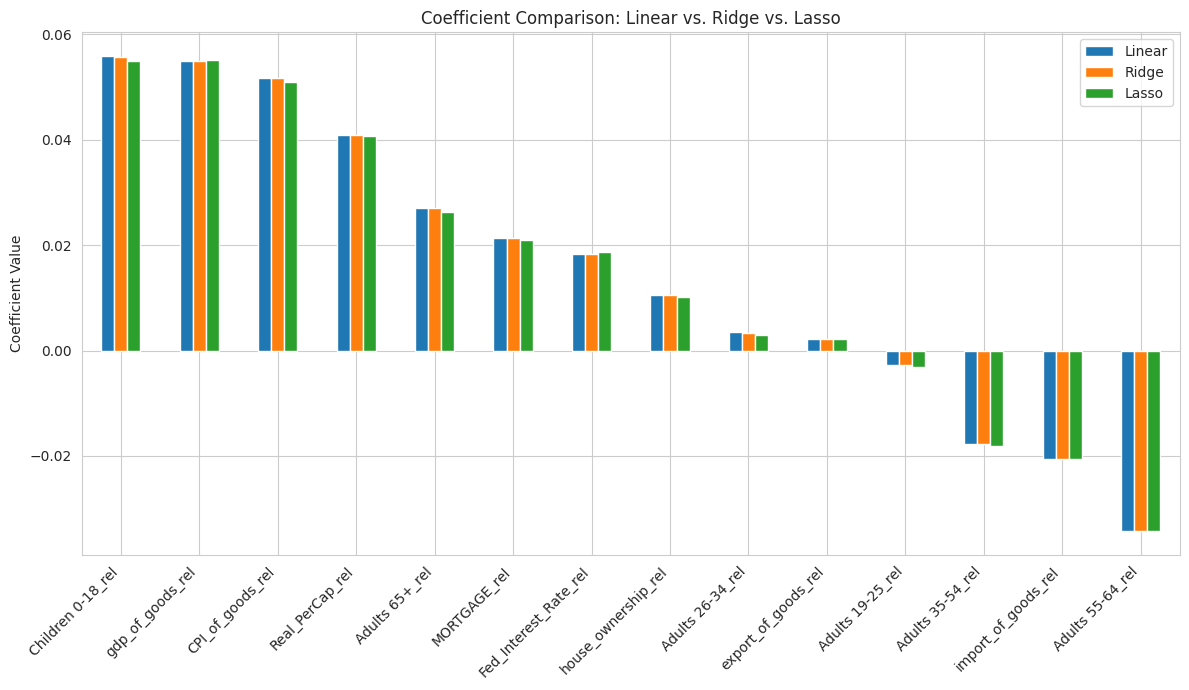

In [ ]:
linear_coef = linear_pipe.named_steps['linear'].coef_
linear_feature_names = linear_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
linear_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(linear_coef)}, index=linear_feature_names)
linear_coef_df = linear_coef_df.sort_values(by = "Coefficient Value", ascending = False)


ridge_coef = ridge_pipe.named_steps['ridge'].coef_
ridge_feature_names = ridge_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
ridge_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(ridge_coef)}, index=ridge_feature_names)
ridge_coef_df = ridge_coef_df.sort_values(by = "Coefficient Value", ascending = False)


lasso_coef = lasso_pipe.named_steps['lasso'].coef_
lasso_feature_names = lasso_pipe.named_steps['poly_features'].get_feature_names_out(X_train.columns)
lasso_coef_df = pd.DataFrame({'Coefficient Value': np.ravel(lasso_coef)}, index=lasso_feature_names)
lasso_coef_df = lasso_coef_df.sort_values(by = "Coefficient Value", ascending = False)




df_lin  = linear_coef_df.rename(columns={'Coefficient Value': 'Linear'})
df_rid  = ridge_coef_df.rename(columns={'Coefficient Value': 'Ridge'})
df_las  = lasso_coef_df.rename(columns={'Coefficient Value': 'Lasso'})

combined_df = pd.concat([df_lin, df_rid, df_las], axis=1)

combined_df = combined_df.sort_values(by='Linear', ascending=False)

ax = combined_df.plot(
    kind='bar',
    figsize=(12, 7),
    title='Coefficient Comparison: Linear vs. Ridge vs. Lasso'
)
ax.set_ylabel('Coefficient Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Hyperparameter selection training

# Linear Model Training


Training and evaluating linear...
Training and evaluating ridge...
Training and evaluating lasso...

Per-Model Test Predictions Plots:


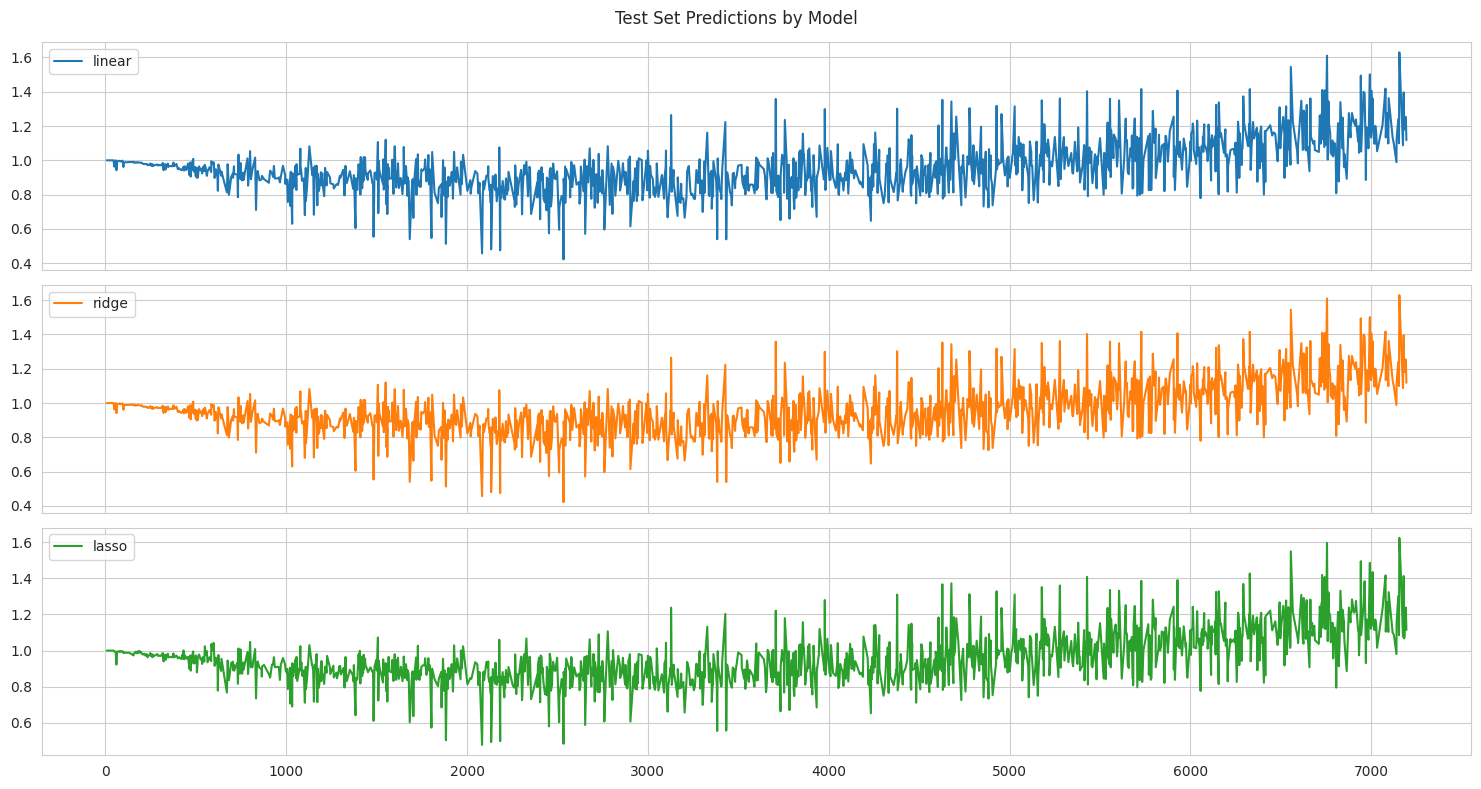


RMSE Summary Table:
       Train RMSE Test RMSE Generalization Gap
linear   0.031636  0.037258           0.005622
ridge    0.031637  0.037276           0.005639
lasso    0.039238  0.041059           0.001821


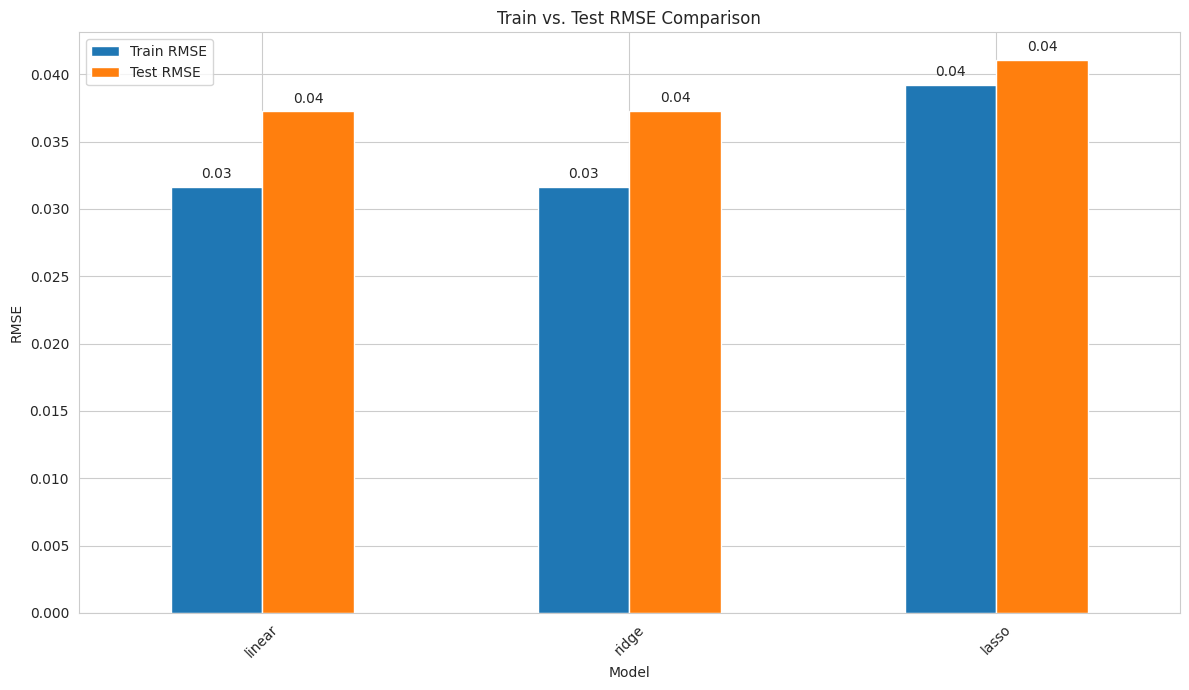


Best Hyperparameters:
linear: {'poly_features__degree': 3}
ridge: {'poly_features__degree': 3, 'ridge__alpha': np.float64(0.001)}
lasso: {'lasso__alphas': array([1.00000000e-04, 1.61026203e-04, 2.59294380e-04, 4.17531894e-04,
       6.72335754e-04, 1.08263673e-03, 1.74332882e-03, 2.80721620e-03,
       4.52035366e-03, 7.27895384e-03, 1.17210230e-02, 1.88739182e-02,
       3.03919538e-02, 4.89390092e-02, 7.88046282e-02, 1.26896100e-01,
       2.04335972e-01, 3.29034456e-01, 5.29831691e-01, 8.53167852e-01,
       1.37382380e+00, 2.21221629e+00, 3.56224789e+00, 5.73615251e+00,
       9.23670857e+00, 1.48735211e+01, 2.39502662e+01, 3.85662042e+01,
       6.21016942e+01, 1.00000000e+02]), 'poly_features__degree': 3}


In [ ]:
results = {}
y_train_pred = {}
y_test_pred = {}

### 3) Train, predict, and collect results
for name, model in models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    y_train_pred[name] = y_pred_train
    y_test_pred[name] = y_pred_test

    # Extract and store coefficients
    try:
        # Get feature names from the polynomial transformer
        poly_features_step = best_model.named_steps['poly_features']
        all_feature_names = poly_features_step.get_feature_names_out(X_train.columns)

        if name == 'lasso_feature_selection':
            # For feature selection model, get the mask of selected features
            selector = best_model.named_steps['selector']
            selected_features_mask = selector.get_support()
            feature_names = all_feature_names[selected_features_mask]

            # The coefficients are from the LinearRegression step
            coefs = best_model.named_steps['lasso_feature_selection_model'].coef_
        else:
            # For all other models, use all feature names
            feature_names = all_feature_names
            # Get the name of the final estimator step (e.g., 'linear', 'ridge', 'lasso')
            estimator_name = list(best_model.named_steps.keys())[-1]
            coefs = best_model.named_steps[estimator_name].coef_

        results[name]['Coefficients'] = pd.DataFrame(coefs, index=feature_names, columns=['Coefficient Value'])
    except KeyError:
        # Handle cases where the model might not have a 'coef_' attribute (e.g., if a different type of model was used)
        print(f"Warning: Could not extract coefficients for model '{name}'.")

### 2) Extract and compare coefficients (Linear, Ridge, Lasso)

#  Plot the per-model test predictions
y_test_pred_df = pd.DataFrame(y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
rmse_df = pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]
rmse_df['Generalization Gap'] = rmse_df['Test RMSE'] - rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in results.items():
    print(f"{name}: {result['Best Parameters']}")

In [ ]:
pd.DataFrame(results).T[['Train RMSE', 'Test RMSE']]

,Train RMSE,Test RMSE
linear,0.031636,0.037258
ridge,0.031637,0.037276
lasso,0.039238,0.041059


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Other Regression techniques

In [ ]:
# Decision Tree Regressor
decision_tree_param_dict = {
    'decisiontree__max_depth': [None, 10, 20, 30],
    'decisiontree__min_samples_split': [2, 5, 10],
    'decisiontree__min_samples_leaf': [1, 2, 4]
}

decision_tree_pipe = Pipeline([
    ('decisiontree', DecisionTreeRegressor())
])

decision_tree_grid = GridSearchCV(
    decision_tree_pipe,
    param_grid=decision_tree_param_dict,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1
)
# Support Vector Regression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

svm_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('svm', SVR())
])

# Update the parameter grid to match the new pipeline steps
svm_param_dict = {
    'poly_features__degree': [1, 2], # Test with and without polynomial features
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto'],
    'svm__kernel': ['rbf', 'linear']
}

svm_grid = GridSearchCV(svm_pipe, param_grid=svm_param_dict, cv=5, scoring='neg_mean_squared_error', verbose=1)



# Model Training

In [ ]:
_# Dictionaries to store results
cf_results = {}
cf_y_train_pred = {}
cf_y_test_pred = {}
# Model registry
classification_models = {
    'decisiontree': decision_tree_grid,
    'svm': svm_grid,
}


### 3) Train, predict, and collect results
for name, model in classification_models.items():
    print(f"Training and evaluating {name}...")

    # Train the model with GridSearchCV
    model.fit(X_train_scaled, y_train)

    # Get the best estimator and make predictions
    best_model = model.best_estimator_
    y_pred_train = best_model.predict(X_train_scaled)
    y_pred_test = best_model.predict(X_test_scaled)

    # Calculate RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # Store results
    cf_results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Best Parameters': model.best_params_, # Store best parameters
        'Result': pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score')
    }

    # Save predictions
    cf_y_train_pred[name] = y_pred_train
    cf_y_test_pred[name] = y_pred_test

Training and evaluating decisiontree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training and evaluating svm...
Fitting 5 folds for each of 24 candidates, totalling 120 fits



Per-Model Test Predictions Plots:


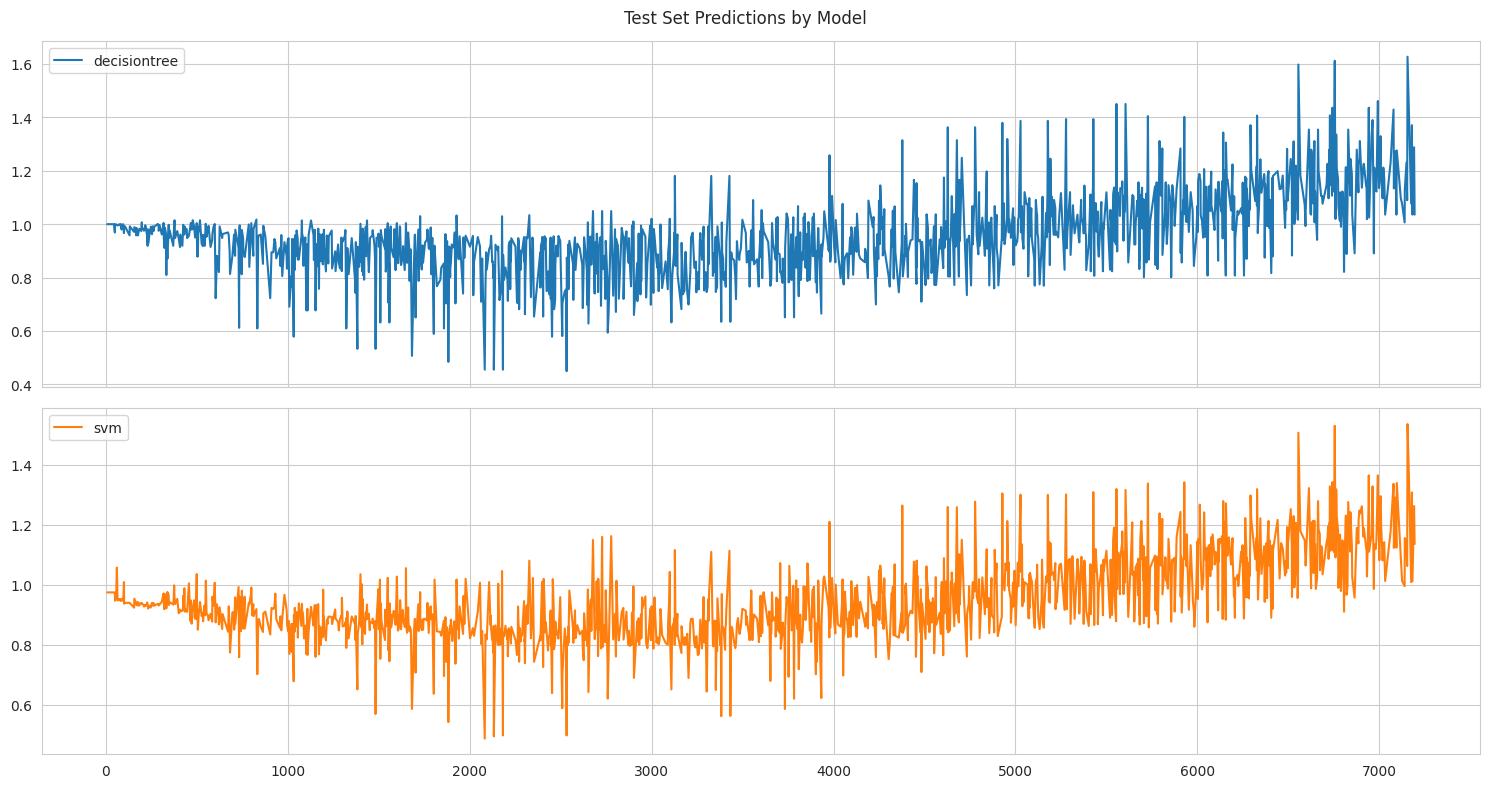


RMSE Summary Table:
             Train RMSE Test RMSE Generalization Gap
decisiontree   0.005938  0.029458            0.02352
svm            0.059528  0.059011          -0.000517


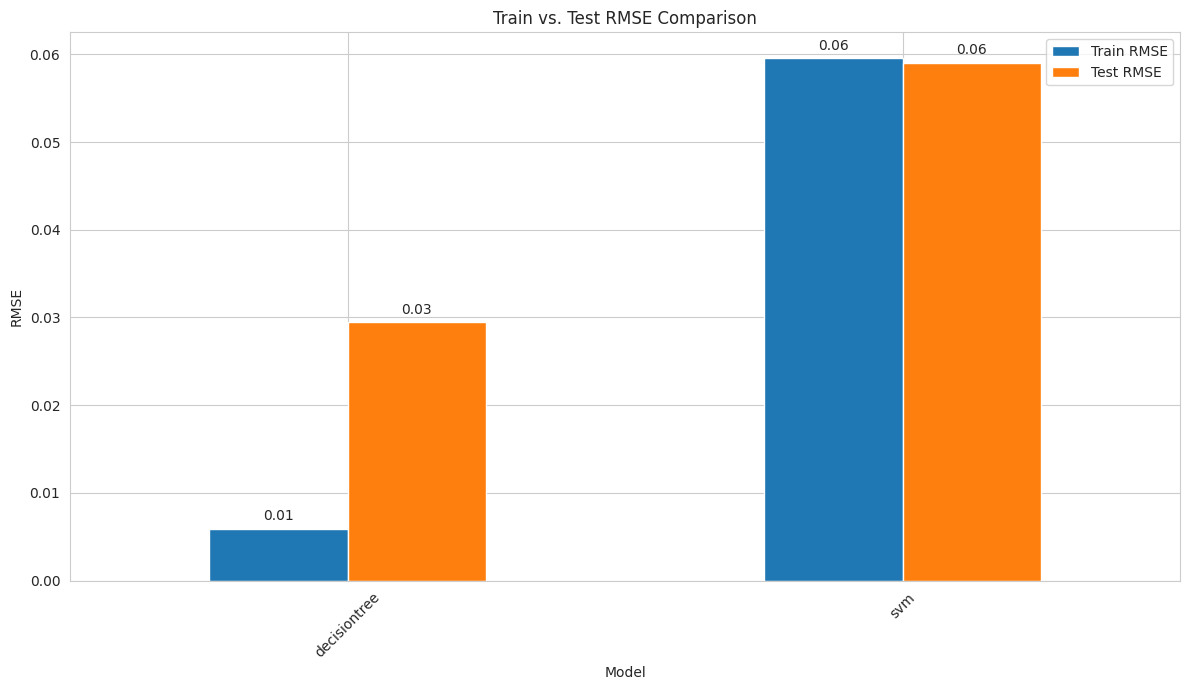


Best Hyperparameters:
decisiontree: {'decisiontree__max_depth': 30, 'decisiontree__min_samples_leaf': 1, 'decisiontree__min_samples_split': 5}
svm: {'poly_features__degree': 1, 'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}


In [ ]:
### 2) Extract and compare coefficients

#  Plot the per-model test predictions
cf_y_test_pred_df = pd.DataFrame(cf_y_test_pred, index=y_test.index)

print("\nPer-Model Test Predictions Plots:")
cf_y_test_pred_df.sort_index().plot(kind='line', figsize=(15,8), subplots=True, title='Test Set Predictions by Model')
plt.tight_layout()
plt.show()

# Summarize and visualize RMSEs
cf_rmse_df = pd.DataFrame(cf_results).T[['Train RMSE', 'Test RMSE']]
cf_rmse_df['Generalization Gap'] = cf_rmse_df['Test RMSE'] - cf_rmse_df['Train RMSE']

print("\nRMSE Summary Table:")
print(cf_rmse_df.sort_values(by='Test RMSE'))

# Plot the RMSEs
ax = cf_rmse_df[['Train RMSE', 'Test RMSE']].sort_values(by='Test RMSE').plot(kind='bar', figsize=(12, 7))
plt.title('Train vs. Test RMSE Comparison')
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate bars with their values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')
plt.show()

# Print best hyperparameters
print("\nBest Hyperparameters:")
for name, result in cf_results.items():
    print(f"{name}: {result['Best Parameters']}")

In [ ]:
# Create a summary DataFrame for feature importances and coefficients
feature_comparison = pd.DataFrame()

# Extract and add Decision Tree feature importances
if 'Feature Importances' in cf_results['decisiontree']:
    feature_comparison['Decision Tree Importance'] = results['decisiontree']['Feature Importances']['Importance']

# Extract and add SVM coefficients (only if linear kernel was chosen)
if 'Coefficients' in cf_results['svm']:
    feature_comparison['SVM Coefficients'] = cf_results['svm']['Coefficients']['Coefficient Value']



# **Train vs. Test RMSE Comparison for all models**




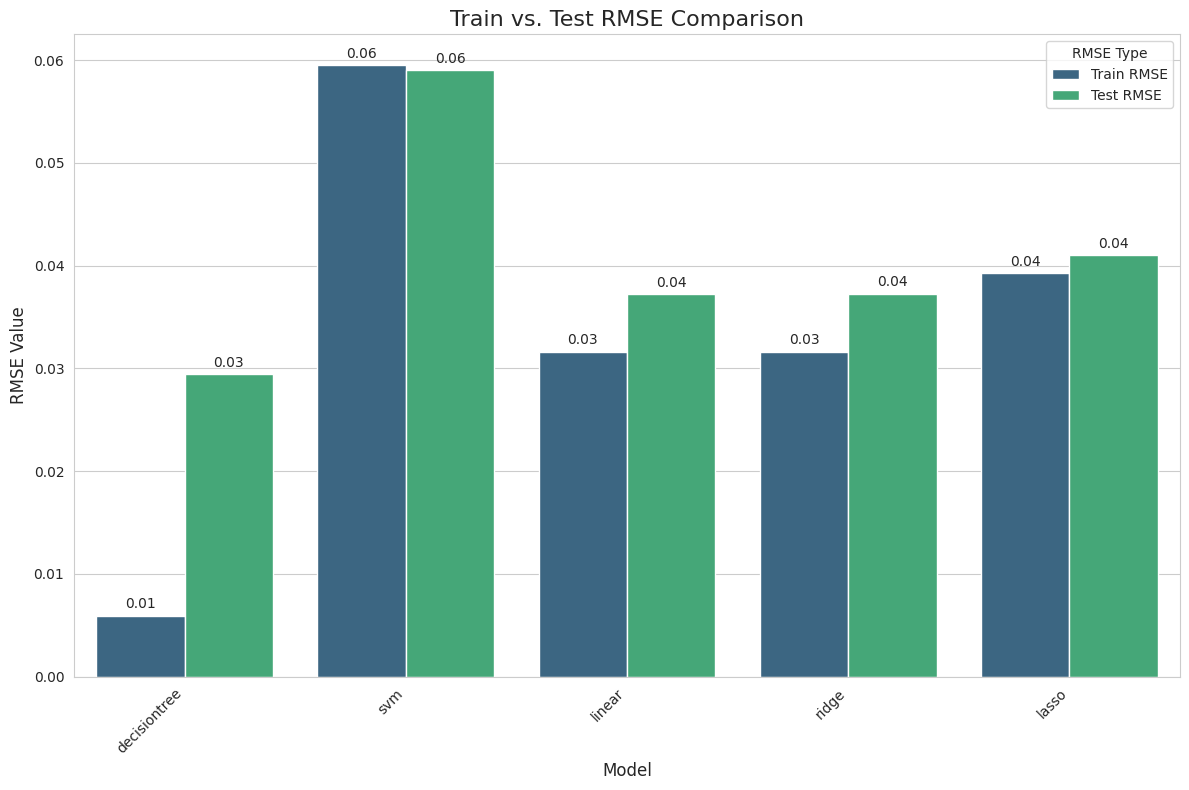

In [ ]:

try:
    # Add a 'Model' column to each DataFrame before concatenating.
    # Replace 'Model' with the actual column name that identifies the model, if different.
    # If the model names are not in a column, you'll need to create one.
    # This example assumes the dataframes have an index that can be used as a model name.
    # If not, you may need to manually add a 'Model' column to each.
    if 'Model' not in cf_rmse_df.columns:
        cf_rmse_df['Model'] = cf_rmse_df.index
    if 'Model' not in rmse_df.columns:
        rmse_df['Model'] = rmse_df.index

    # Combine the DataFrames
    comparison_df = pd.concat([cf_rmse_df, rmse_df], ignore_index=True)

    # Set a clean style for the plot
    sns.set_style("whitegrid")

    # Melt the DataFrame to a long format for easier plotting with seaborn
    melted_df = comparison_df.melt(id_vars='Model', value_vars=['Train RMSE', 'Test RMSE'],
                                   var_name='RMSE Type', value_name='RMSE Value')

    # Create the grouped bar chart
    plt.figure(figsize=(12, 8))
    barplot = sns.barplot(x='Model', y='RMSE Value', hue='RMSE Type', data=melted_df, palette='viridis')

    # Add labels and a title
    plt.xlabel("Model", fontsize=12)
    plt.ylabel("RMSE Value", fontsize=12)
    plt.title("Train vs. Test RMSE Comparison", fontsize=16)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha="right")

    # Add the RMSE values on top of the bars for clarity
    for container in barplot.containers:
        barplot.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=10)

    # Adjust plot layout
    plt.tight_layout()

    # Display the plot
    plt.show()

except NameError:
    print("Error: `cf_rmse_df` or `rmse_df` not found.")
    print("Please make sure these DataFrames are defined in your notebook before running this cell.")



Linear SVR Training RMSE: 0.0872
Linear SVR Test RMSE: 0.0858




/tmp/ipython-input-2340260634.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


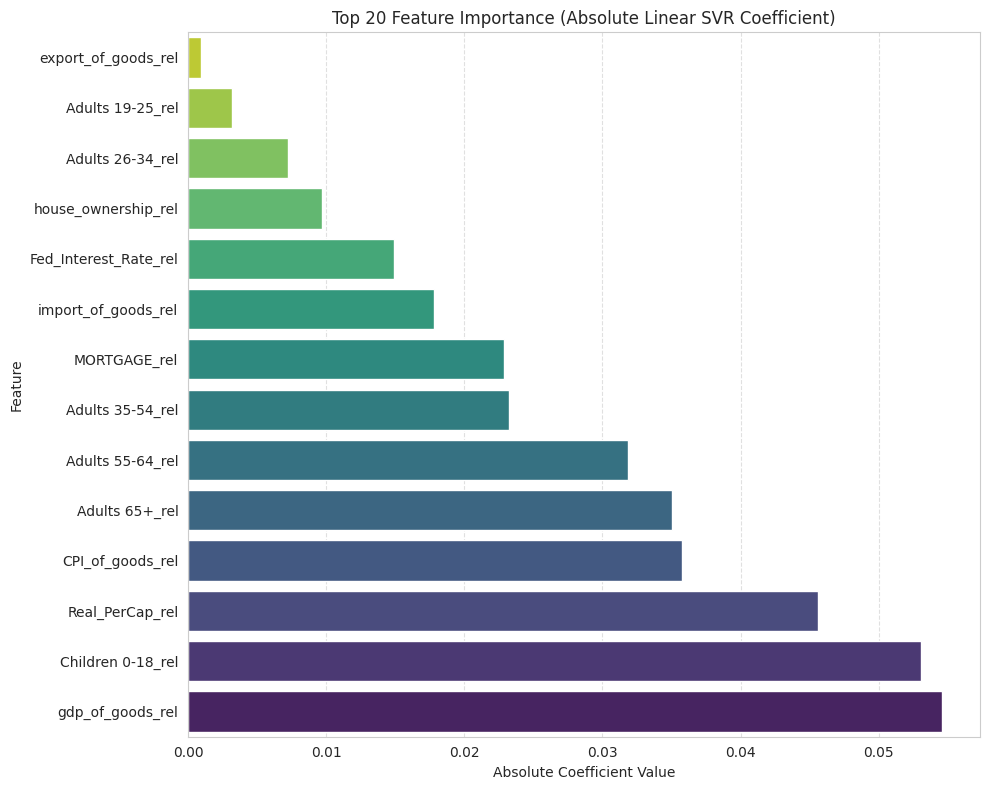

/tmp/ipython-input-2340260634.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


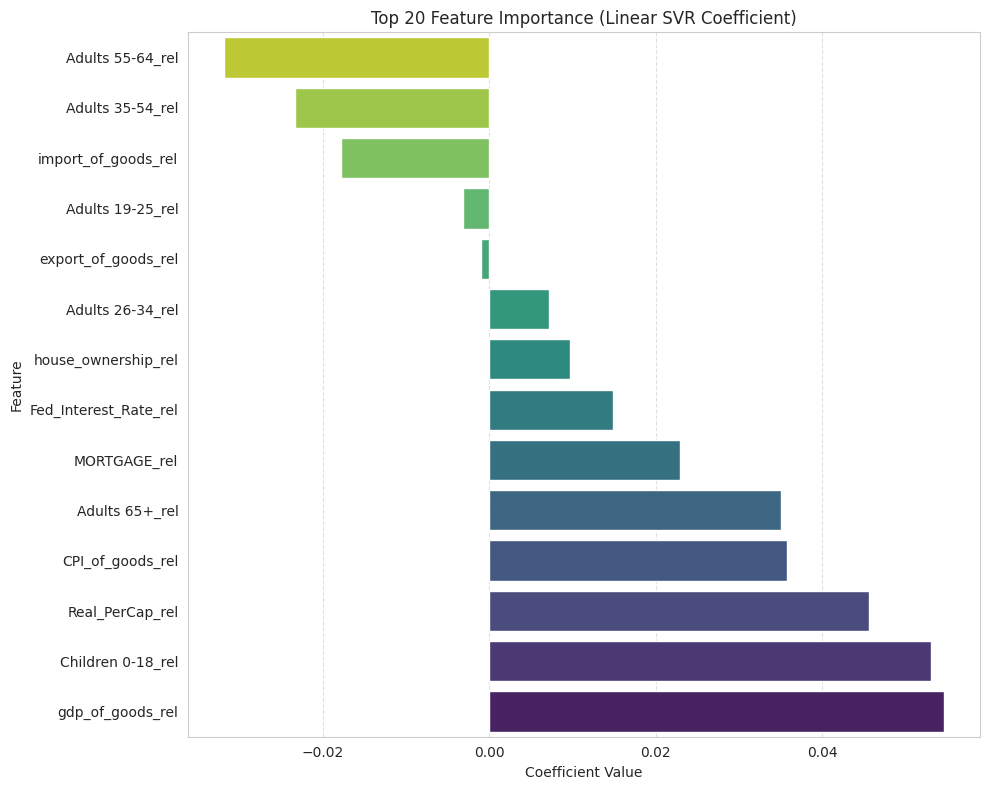

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Train the Linear SVR Model ---
# Use Pipeline to scale and then train SVR with a linear kernel
svr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='linear'))
])

# Fit the model using the relative training data
# Assuming X_train_rel and y_train_rel are available
svr_pipeline.fit(X_train_scaled, y_train)

# --- 2. Calculate and Print RMSE ---

# Predict on the Training Set
y_train_pred = svr_pipeline.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Predict on the Test Set (Crucial for assessing generalization)
# Assuming X_test_rel and y_test_rel are available
y_test_pred = svr_pipeline.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Linear SVR Training RMSE: {train_rmse:.4f}")
print(f"Linear SVR Test RMSE: {test_rmse:.4f}")
print("\n" + "="*40 + "\n")
feature_names = X_train.columns.tolist()


# --- 3. Extract and Process Coefficients for Importance Plot ---
# The Linear SVR coefficients are in the 'svr' step of the pipeline
coefficients = svr_pipeline.named_steps['svr'].coef_.ravel()

# Create a DataFrame for easy sorting and plotting
# Assuming 'feature_names' (e.g., X_train_rel.columns) is available
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient_Absolute': np.abs(coefficients)
}).sort_values(by='Coefficient_Absolute', ascending=False)


# --- 4. Plot Feature Importance ---
# Select the top 20 features for plotting
top_n = 20
plot_data = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient_Absolute',
    y='Feature',
    data=plot_data,
    palette='viridis'
)

plt.title(f'Top {top_n} Feature Importance (Absolute Linear SVR Coefficient)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.tight_layout()
plt.savefig("linear_svr_feature_importance.png")
plt.show()


# --- 5. Extract and Process Coefficients for Importance Plot ---
# The Linear SVR coefficients are in the 'svr' step of the pipeline
coefficients = svr_pipeline.named_steps['svr'].coef_.ravel()

# Create a DataFrame for easy sorting and plotting
# Assuming 'feature_names' (e.g., X_train_rel.columns) is available
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)


# --- 6. Plot Feature Importance ---
# Select the top 20 features for plotting
top_n = 20
plot_data = feature_importance_df.head(top_n)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=plot_data,
    palette='viridis'
)

plt.title(f'Top {top_n} Feature Importance (Linear SVR Coefficient)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis() # Puts the most important feature at the top
plt.tight_layout()
plt.savefig("linear_svr_feature_importance.png")
plt.show()

# Evaluation

Our goal was to understand the key drivers of average used house prices. We trained multiple models: Linear Regression, Ridge, Lasso, Lasso with Feature Selection, Support Vector Machine (SVM), and Decision Tree. We used GridSearchCV to select the best hyperparameters for each model, specifically focusing on the polynomial degree for feature transformation and the alpha value for regularization in Ridge and Lasso. Cross-validation was used to ensure that both the hyperparameter choices and model performance were robust.

We chose Root Mean Squared Error (RMSE) as our evaluation metric. RMSE is well-suited for regression tasks as it measures the average magnitude of errors between predicted and actual prices, expressed in the same units as the target variable (dollars).

Regular Data

Linear Regression, Ridge, and Lasso showed similar performance, with test RMSE values ranging from $5,300 to $5,700. The Ridge model with feature engineering achieved a slightly lower RMSE, suggesting it may generalize marginally better.
Decision Tree and SVM, however, had relatively higher RMSE values, making them unsuitable for this dataset.

Relative Increase Data

Linear Regression, Ridge, and Lasso again showed similar performance, with test RMSE values around 0.03 to 0.04 (percent relative increase).
SVM performed poorly, with a very high RMSE, making it unsuitable for comparison. In contrast, the Decision Tree model achieved a lower RMSE than all other models, making it the best fit for this dataset.